## Final Project Submission

Please fill out:
* Student name: __Scott Okamura__
* Student pace: ___self paced___ / part time / full time
* Scheduled project review date/time: 
* Instructor name: __Jeff Herman__
* Blog post URL:


In [3]:
ls

2020_LoL_esports_match_data_from_OraclesElixir_20201006.csv
2020_LoL_esports_match_data_from_OraclesElixir_20201014.csv
CONTRIBUTING.md
LICENSE.md
README.md
Scott.ipynb
module_3_project_rubric.pdf
project.ipynb
smart.gif


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [5]:
df = pd.read_csv('2020_LoL_esports_match_data_from_OraclesElixir_20201006.csv')
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,23.0,4888.0,7368.0,131.0,4723.0,7202.0,118.0,165.0,166.0,13.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-10.0,4385.0,4817.0,91.0,4784.0,4667.0,98.0,-399.0,150.0,-7.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-9.0,4809.0,6275.0,129.0,5218.0,8112.0,140.0,-409.0,-1837.0,-11.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,3.0,4915.0,4959.0,136.0,4864.0,5360.0,135.0,51.0,-401.0,1.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,1.0,2956.0,3800.0,20.0,3189.0,3543.0,28.0,-233.0,257.0,-8.0


In [6]:
df.shape

(69324, 105)

In [7]:
df.dtypes.value_counts()

float64    69
int64      20
object     16
dtype: int64

In [8]:
df.select_dtypes('object').columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'split', 'date', 'side',
       'position', 'player', 'team', 'champion', 'ban1', 'ban2', 'ban3',
       'ban4', 'ban5'],
      dtype='object')

In [9]:
df.select_dtypes('int64').columns

Index(['year', 'playoffs', 'game', 'playerid', 'gamelength', 'result', 'kills',
       'deaths', 'assists', 'teamkills', 'teamdeaths', 'damagetochampions',
       'wardsplaced', 'wardskilled', 'controlwardsbought', 'totalgold',
       'earnedgold', 'monsterkills', 'monsterkillsownjungle',
       'monsterkillsenemyjungle'],
      dtype='object')

In [10]:
df.select_dtypes('float64').columns

Index(['patch', 'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim',
       'team kpm', 'ckpm', 'firstdragon', 'dragons', 'opp_dragons',
       'elementaldrakes', 'opp_elementaldrakes', 'infernals', 'mountains',
       'clouds', 'oceans', 'dragons (type unknown)', 'elders', 'opp_elders',
       'firstherald', 'heralds', 'opp_heralds', 'firstbaron', 'barons',
       'opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower',
       'firsttothreetowers', 'inhibitors', 'opp_inhibitors', 'dpm',
       'damageshare', 'damagetakenperminute', 'damagemitigatedperminute',
       'wpm', 'wcpm', 'visionscore', 'vspm', 'earned gpm', 'earnedgoldshare',
       'goldspent', 'gspd', 'total cs', 'minionkills', 'cspm', 'goldat10',
       'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10',
       'golddiffat10', 'xpdiffat10', 'csdiffat10', 'goldat15', 'xpat15',
       'csat15', 'opp_goldat15', 'opp_x

## Data Cleaning

As this model is aiming to predict the winner of this year's World Championship Series, the teams that are included in the dataset will only be the ones that are participating in the event as well as their respective regional opponents during the second half of the 2020 regular and post season. Data will be taken from the 2nd half of the year to account for patch changes (which can include new characters and viable items) and frequently changing metagames (in-game strategies). This should also provide a better winning prediction by factoring in recent team performances.

In [11]:
df['league'].value_counts()

LDL      11508
LPL       8712
LCK       5676
VCS       3660
CK        3624
PCS       3264
LCS       3168
EM        3120
LEC       2892
OPL       2604
LCS.A     2580
TCL       2436
CBLOL     2352
TRA       2184
LFL       1992
LJL       1980
LLA       1908
BRCC      1680
LCL       1512
WCS        996
OCS        816
MSC        300
Riot       240
KeSPA      120
Name: league, dtype: int64

In [12]:
df.loc[df['league'] == 'WCS']['date']

65400    2020-08-28 07:26:00
65401    2020-08-28 07:26:00
65402    2020-08-28 07:26:00
65403    2020-08-28 07:26:00
65404    2020-08-28 07:26:00
                ...         
69319    2020-10-06 11:43:09
69320    2020-10-06 11:43:09
69321    2020-10-06 11:43:09
69322    2020-10-06 11:43:09
69323    2020-10-06 11:43:09
Name: date, Length: 996, dtype: object

In [13]:
# first day of group play after all 16 teams decided
# dates in august/september were to decide final 4 teams that will play in group play

df.loc[(df['league'] == 'WCS') & (df['date'] > '2020-10-03')]['team'].value_counts()

Machi Esports           18
G2 Esports              18
DRX                     18
Rogue                   18
Top Esports             18
Fnatic                  18
Gen.G                   18
PSG Talon               18
FlyQuest                18
Unicorns Of Love.CIS    18
DAMWON Gaming           18
Team Liquid             18
Suning                  18
JD Gaming               18
Team SoloMid            12
LGD Gaming              12
Name: team, dtype: int64

In [14]:
# list of all 16 teams participating in worlds

wc_teams = df.loc[(df['league'] == 'WCS') & (df['date'] > '2020-10-03')]['team'].value_counts().index

In [15]:
for x in wc_teams:
    print(x)

Machi Esports
G2 Esports
DRX
Rogue
Top Esports
Fnatic
Gen.G
PSG Talon
FlyQuest
Unicorns Of Love.CIS
DAMWON Gaming
Team Liquid
Suning
JD Gaming
Team SoloMid
LGD Gaming


In [16]:
wc_leagues = ['WCS']
for x in wc_teams:
    lg = df.loc[(df['team'] == x) & (df['date'] < '2020-10-03')]['league'].values[0]
    if lg in wc_leagues:
        continue
    else:
        wc_leagues.append(lg)
    
    
print(wc_leagues)

['WCS', 'PCS', 'LEC', 'KeSPA', 'LPL', 'LCK', 'LCS', 'LCL']


 The regions that are represented in the knock-out stage of World's this year follow a spring/summer schedule. The dataset will focus on the summer split performances of the teams that are still in contention for the title.

In [17]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True, format='%Y/%m/%d')

In [18]:
df['date'] = df['date'].dt.normalize()

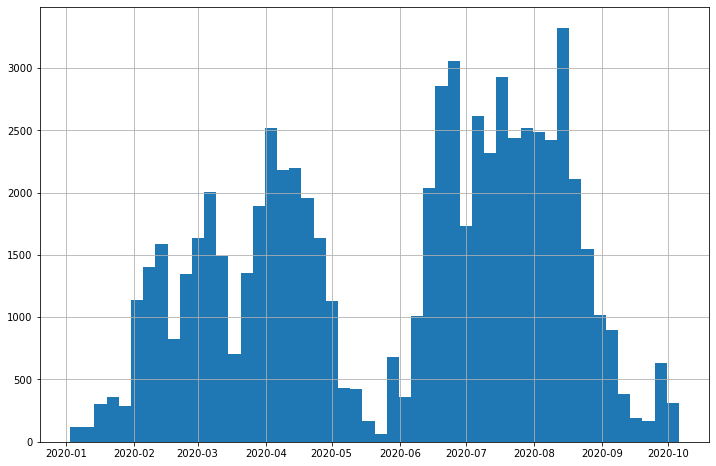

In [19]:
df['date'].sort_index().hist(bins='auto', figsize=(12,8) );

In [20]:
df.loc[(df['split'] == 'Summer') & 
       (df['date'] < '2020-06-05')& 
       (df['league'].isin(wc_leagues)), 
       ('league', 'split', 'date')].tail()

,league,split,date
27487,LCK,Summer,2020-04-30
27488,LCK,Summer,2020-04-30
27489,LCK,Summer,2020-04-30
27490,LCK,Summer,2020-04-30
27491,LCK,Summer,2020-04-30


In [21]:
df.loc[(df['split'] == 'Summer') & 
       (df['date'] > '2020-06-05')& 
       (df['league'].isin(wc_leagues)), 
       ('league', 'split', 'date')].head()

,league,split,date
30156,LPL,Summer,2020-06-06
30157,LPL,Summer,2020-06-06
30158,LPL,Summer,2020-06-06
30159,LPL,Summer,2020-06-06
30160,LPL,Summer,2020-06-06


These rows have been mislabeled and should be part of the `spring` split. There are no other instances of mislabeled splits as the earliest league to start their summer split was the LPL region on June 5th.

In [22]:
drop_index = df.loc[(df['date'] < '2020-06-05')].index
                    
drop_index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998,
            29999],
           dtype='int64', length=30000)

In [23]:
drop_leagues = df.loc[(~(df['league'].isin(wc_leagues))) & (df['date'] > '2020-06-05')].index
drop_leagues

Int64Index([30108, 30109, 30110, 30111, 30112, 30113, 30114, 30115, 30116,
            30117,
            ...
            69038, 69039, 69040, 69041, 69042, 69043, 69044, 69045, 69046,
            69047],
           dtype='int64', length=25728)

In [24]:
df_sum = df.drop(drop_index)
df_sum.shape

(39324, 105)

In [25]:
df_sum.drop(drop_leagues, inplace=True)
df_sum.shape

(13596, 105)

In [26]:
df_sum['league'].value_counts()

LPL    4380
LCK    2676
PCS    1680
LCS    1668
LEC    1440
WCS     996
LCL     708
OPL      48
Name: league, dtype: int64

In [27]:
opl = df_sum.loc[df_sum['league'] == 'OPL'].index
df_sum.drop(opl, inplace=True)
df_sum.shape

(13548, 105)

In [28]:
df_sum['league'].value_counts()

LPL    4380
LCK    2676
PCS    1680
LCS    1668
LEC    1440
WCS     996
LCL     708
Name: league, dtype: int64

In [29]:
wc_leagues.remove('KeSPA') # KeSPA is a pre-season invitational held at the beginning of the calendar year in Korea
wc_leagues

['WCS', 'PCS', 'LEC', 'LPL', 'LCK', 'LCS', 'LCL']

In [30]:
df_sum.isna().sum().sort_values(ascending=False).head(30)

dragons (type unknown)    13518
firstbaron                11348
mountains                 11320
opp_elders                11320
elders                    11320
oceans                    11320
clouds                    11320
elementaldrakes           11320
opp_elementaldrakes       11320
infernals                 11320
firstmidtower             11296
firsttothreetowers        11294
firsttower                11294
heralds                   11294
firstherald               11294
opp_heralds               11294
firstdragon               11294
opp_dragons               11290
dragons                   11290
opp_towers                11290
towers                    11290
opp_barons                11290
barons                    11290
gspd                      11290
inhibitors                 3774
opp_inhibitors             3774
firstbloodassist           2278
firstbloodvictim           2278
firstbloodkill             2278
earnedgoldshare            2258
dtype: int64

In [31]:
df_sum.shape

(13548, 105)

This dataset contains many missing values that cannot be imputed due to the nature of the missing value. Therefore, many of these columns will be dropped as they cannot be used reliably to draw predictions. For now, any column that is missing more than 10,000 entries (almost 80% of summer split data) will be removed from the dataset.

### Possible area of improvement

Rather than removing these columns, additional analysis could be done on the missing values to determine possible placeholder values or methods to calculate/infer the data. For the purpose of this project, these values will be dropped.

In [32]:
to_drop = df_sum.loc[:, (df_sum.isna().sum() > 10000)].columns
to_drop

Index(['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
       'opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans',
       'dragons (type unknown)', 'elders', 'opp_elders', 'firstherald',
       'heralds', 'opp_heralds', 'firstbaron', 'barons', 'opp_barons',
       'firsttower', 'towers', 'opp_towers', 'firstmidtower',
       'firsttothreetowers', 'gspd'],
      dtype='object')

In [33]:
df_sum.drop(columns=to_drop, axis=1, inplace=True)
df_sum.shape

(13548, 81)

In [34]:
df_sum.isna().sum().sort_values(ascending=False).head(15)

opp_inhibitors      3774
inhibitors          3774
firstbloodvictim    2278
firstbloodassist    2278
firstbloodkill      2278
earnedgoldshare     2258
total cs            2258
champion            2258
player              2258
damageshare         2258
split                996
minionkills          754
cspm                 754
ban3                  42
csdiffat15            36
dtype: int64

## Inhibitors

In [35]:
df_sum.loc[df_sum['opp_inhibitors'].isnull(), :].head(24)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30048,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
30049,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
30050,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
30051,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
30052,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0
30053,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,14.0,5830.0,7379.0,144.0,4733.0,7268.0,124.0,1097.0,111.0,20.0
30054,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-25.0,5302.0,5616.0,90.0,4942.0,6254.0,114.0,360.0,-638.0,-24.0
30055,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-14.0,4943.0,6598.0,127.0,6132.0,8112.0,170.0,-1189.0,-1514.0,-43.0
30056,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-26.0,4631.0,4484.0,116.0,7594.0,5654.0,155.0,-2963.0,-1170.0,-39.0
30057,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,8.0,3414.0,3794.0,31.0,4201.0,4037.0,21.0,-787.0,-243.0,10.0


In [36]:
df_sum.loc[(df_sum['position'] == 'team'), :]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30058,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
30059,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
30070,6200-7808,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,2,10.11,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
30071,6200-7808,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,2,10.11,...,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0
30082,6200-7809,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,3,10.11,...,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69299,ESPORTSTMNT03/1551814,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,-36.0,22744.0,28093.0,491.0,24396.0,29603.0,564.0,-1652.0,-1510.0,-73.0
69310,ESPORTSTMNT03/1551821,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,44.0,25826.0,31261.0,531.0,22124.0,28787.0,465.0,3702.0,2474.0,66.0
69311,ESPORTSTMNT03/1551821,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,-44.0,22124.0,28787.0,465.0,25826.0,31261.0,531.0,-3702.0,-2474.0,-66.0
69322,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,15.0,27314.0,30527.0,506.0,25163.0,29047.0,444.0,2151.0,1480.0,62.0


`opp_inhibitors` and `inhibitors` are missing from the individual player data as the game does keep track of inhibitor kills by player but rather by team. The rows following the 10 players in the game show the averaged team stats. 

The size of the dataset can be reduced by combining the relevant individual player stats into a single row, similar to the last 2 rows of each `gameid` (where `position` is labeled as `team`). 

In [37]:
df_sum.head(12)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
30048,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
30049,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
30050,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
30051,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
30052,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0
30053,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,14.0,5830.0,7379.0,144.0,4733.0,7268.0,124.0,1097.0,111.0,20.0
30054,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-25.0,5302.0,5616.0,90.0,4942.0,6254.0,114.0,360.0,-638.0,-24.0
30055,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-14.0,4943.0,6598.0,127.0,6132.0,8112.0,170.0,-1189.0,-1514.0,-43.0
30056,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-26.0,4631.0,4484.0,116.0,7594.0,5654.0,155.0,-2963.0,-1170.0,-39.0
30057,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,8.0,3414.0,3794.0,31.0,4201.0,4037.0,21.0,-787.0,-243.0,10.0


In [38]:
df_sum['playerid'].isnull().any() # check that all games have their player and team data entries

False

In [39]:
len(df_sum)/12

1129.0

Each match is split between 12 rows, 10 for the players and 2 for each team. Given the length of the dataset, we can expect to have data on 1129 completed summer split and world's matches. Before condensing the dataset by combining player and team data, I will continue to investigate the other columns with missing values.

In [40]:
df_sum.isna().sum().sort_values(ascending=False).head(15)

opp_inhibitors      3774
inhibitors          3774
firstbloodvictim    2278
firstbloodassist    2278
firstbloodkill      2278
earnedgoldshare     2258
total cs            2258
champion            2258
player              2258
damageshare         2258
split                996
minionkills          754
cspm                 754
ban3                  42
csdiffat15            36
dtype: int64

In [41]:
fb = df_sum.isna().sum().sort_values(ascending=False)[2:5].index

In [42]:
df_sum.reset_index(drop=True, inplace=True)

## Firstblood

In [43]:
df_sum.loc[:11, fb]

,firstbloodvictim,firstbloodassist,firstbloodkill
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


The "firstblood" stats for `victim`, `assist`, and `kill` are missing in the team data row and are instead given to each player who received the credit. These values can be condensed like the `inhibitors` value above. A `1.0` value in any of the `firstblood` columns means that the team that player belongs to will receive the credit. As we are not going to be taking individual player statistics to predict the winner, it is not necessary to know which _player_ got the credit but rather the _team_ that player belongs to.

In [44]:
df_sum.isnull().sum().sort_values(ascending=False).head(15)

opp_inhibitors      3774
inhibitors          3774
firstbloodvictim    2278
firstbloodassist    2278
firstbloodkill      2278
earnedgoldshare     2258
total cs            2258
champion            2258
player              2258
damageshare         2258
split                996
minionkills          754
cspm                 754
ban3                  42
csdiffat15            36
dtype: int64

## Other missing values

In [45]:
miss = df_sum.isnull().sum().sort_values(ascending=False)[5:13].index
df_sum.loc[:11, miss]

,earnedgoldshare,total cs,champion,player,damageshare,split,minionkills,cspm
0,0.184881,268.0,Aatrox,Aodi,0.235007,Summer,252.0,7.6864
1,0.188864,232.0,Nidalee,JunJia,0.185995,Summer,31.0,6.6539
2,0.206563,307.0,Syndra,Scout,0.227427,Summer,276.0,8.8050
3,0.299770,336.0,Kalista,Hope,0.212667,Summer,298.0,9.6367
4,0.119922,39.0,Sett,Meiko,0.138903,Summer,39.0,1.1185
5,0.264842,306.0,Renekton,Morgan,0.208706,Summer,302.0,8.7763
6,0.181290,168.0,Elise,beishang,0.127775,Summer,22.0,4.8184
7,0.214328,266.0,Aurelion Sol,Teacherma,0.138023,Summer,239.0,7.6291
8,0.266969,330.0,Aphelios,Jiumeng,0.443646,Summer,299.0,9.4646
9,0.072571,45.0,Nautilus,Missing,0.081850,Summer,45.0,1.2906


The columns above (besides `split`) contain the player values but do not have the overall team data. This can be expected for values such as `earnedgoldshare` and `damageshare` as their values have been calculated as a percentage of the overall team value. Combining these columns would only result in a `damageshare` per team being 100%. Since the model is not factoring individual stats, `earnedgoldshare` and `damageshare` can be dropped. This will also most likely include any other `~share` columns that we may find later on.

The `player` column will be dropped as we are not including individual player statistics.


In [46]:
df_sum.loc[:11, ('total cs', 'minionkills', 'monsterkills')]

,total cs,minionkills,monsterkills
0,268.0,252.0,16
1,232.0,31.0,201
2,307.0,276.0,31
3,336.0,298.0,38
4,39.0,39.0,0
5,306.0,302.0,4
6,168.0,22.0,146
7,266.0,239.0,27
8,330.0,299.0,31
9,45.0,45.0,0



The `total cs` column shows the amount of minions + monsters each player killed in the game. In order to get a team value, the player values will be totaled for each team. This will also allow us to remove `minionkills` from the dataset since it can be calculated using `total cs` and `monsterkills`. 

In [47]:
df_sum.loc[:11, ('total cs', 'gamelength', 'cspm')]

,total cs,gamelength,cspm
0,268.0,2092,7.6864
1,232.0,2092,6.6539
2,307.0,2092,8.8050
3,336.0,2092,9.6367
4,39.0,2092,1.1185
5,306.0,2092,8.7763
6,168.0,2092,4.8184
7,266.0,2092,7.6291
8,330.0,2092,9.4646
9,45.0,2092,1.2906


In [48]:
268/(2092/60) # total cs / (game length in seconds/ 60 seconds)

7.686424474187381

In [49]:
df_sum['result'].value_counts()

1    6774
0    6774
Name: result, dtype: int64

The `champion` column will be left alone for now but will most likely be dropped in the future. Although it is very important to know which characters are playing in each game to determine a winner, this will ultimately complicate our prediction model. We would need to include the 5 characters that each team selected for each match in order to predict the winner. This can be done by finding patterns in character selections for each team/patch/player. However, this would require much more time and will be noted as a ___potential area for improvement___.

`cspm` is calculated using the `total cs` and `gamelength` columns. I am not certain that `gamelength` shows any correlation to the target variable `result` yet. This will have to be further investigated once the player and team data are combined into a single row. CS per minute, `cspm` can be calculated per team once the team totals are calculated.

In [50]:
# running list of all cols to be dropped
drop_cols = ['earnedgoldshare', 'champion', 'player', 'damageshare', 
             'minionkills'] 

In [51]:
df_sum.isnull().sum().sort_values(ascending=False)[10:].head(15)


split           996
minionkills     754
cspm            754
ban3             42
csdiffat15       36
xpat10           36
goldat10         36
csat10           36
goldat15         36
golddiffat15     36
opp_csat15       36
opp_xpat15       36
opp_goldat15     36
csat15           36
opp_goldat10     36
dtype: int64

In [52]:
df_sum['split'].value_counts()

Summer    12456
Spring       96
Name: split, dtype: int64

In [53]:
df_sum.loc[df_sum['split'] == 'Spring', 'team'].value_counts() # not any team in wc_teams

Resurgence       30
Impunity         30
unknown team     18
Liyab Esports    18
Name: team, dtype: int64

There were some remaining `split` values that needed to be removed. The 996 null values in `split` are the matches that were completed during the WCS. The null values will be replaced with the term `Worlds`.

In [54]:
drop_spr = df_sum.loc[(df_sum['split'] == 'Spring')].index
df_sum.drop(drop_spr, inplace=True)

In [55]:
df_sum['split'].value_counts()

Summer    12456
Name: split, dtype: int64

In [56]:
df_sum.loc[df_sum['split'].isnull()]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
11712,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,...,-3.0,5241.0,7781.0,146.0,5291.0,7249.0,132.0,-50.0,532.0,14.0
11713,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,...,10.0,4897.0,5980.0,111.0,4720.0,5441.0,101.0,177.0,539.0,10.0
11714,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,...,10.0,5271.0,7318.0,151.0,5659.0,8180.0,142.0,-388.0,-862.0,9.0
11715,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,...,20.0,5359.0,6131.0,144.0,5510.0,5925.0,140.0,-151.0,206.0,4.0
11716,6700-8959,complete,https://lpl.qq.com/es/stats.shtml?bmid=6700,WCS,2020,NaN,0,2020-08-28,1,10.16,...,1.0,3146.0,3382.0,24.0,3517.0,3954.0,19.0,-371.0,-572.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13543,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,-12.0,6493.0,8104.0,137.0,5653.0,7837.0,143.0,840.0,267.0,-6.0
13544,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,-25.0,4381.0,5444.0,87.0,6674.0,5905.0,136.0,-2293.0,-461.0,-49.0
13545,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,3.0,3464.0,2896.0,14.0,3795.0,3224.0,18.0,-331.0,-328.0,-4.0
13546,ESPORTSTMNT03/1551831,complete,http://matchhistory.na.leagueoflegends.com/en/...,WCS,2020,NaN,0,2020-10-06,1,10.19,...,15.0,27314.0,30527.0,506.0,25163.0,29047.0,444.0,2151.0,1480.0,62.0


In [57]:
df_sum['split'].fillna(value='Worlds', inplace=True)

In [58]:
df_sum['split'].isnull().sum()

0

In [59]:
miss_cols = df_sum.loc[:,(df_sum.isnull().sum() > 0) & (df_sum.isnull().sum() < 50)].columns
df_sum.loc[df_sum[miss_cols].isnull().any(axis=1), miss_cols]

,gameid,ban1,ban2,ban3,ban4,ban5,goldat10,xpat10,csat10,opp_goldat10,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
144,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3130.0,4734.0,80.0,3255.0,...,2.0,6020.0,7925.0,134.0,4857.0,7086.0,121.0,1163.0,839.0,13.0
145,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3256.0,3598.0,72.0,3345.0,...,-2.0,5079.0,5082.0,90.0,4734.0,5544.0,105.0,345.0,-462.0,-15.0
146,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3469.0,4849.0,94.0,3335.0,...,5.0,5754.0,7448.0,141.0,5199.0,7693.0,151.0,555.0,-245.0,-10.0
147,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,3540.0,3675.0,92.0,3188.0,...,12.0,6985.0,6633.0,156.0,4932.0,5486.0,131.0,2053.0,1147.0,25.0
148,6205-7819,LeBlanc,Trundle,Yuumi,NaN,Hecarim,2530.0,2024.0,15.0,2110.0,...,2.0,3708.0,3058.0,21.0,3139.0,3085.0,23.0,569.0,-27.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,ESPORTSTMNT03/1531295,Shen,Azir,Zoe,NaN,Caitlyn,2872.0,2867.0,51.0,2663.0,...,-1.0,4881.0,5536.0,98.0,4336.0,5081.0,94.0,545.0,455.0,4.0
13070,ESPORTSTMNT03/1531295,Shen,Azir,Zoe,NaN,Caitlyn,3377.0,4203.0,72.0,3349.0,...,-3.0,5023.0,6791.0,123.0,5001.0,7055.0,123.0,22.0,-264.0,0.0
13071,ESPORTSTMNT03/1531295,Shen,Azir,Zoe,NaN,Caitlyn,3863.0,3025.0,84.0,3250.0,...,-4.0,6014.0,4701.0,133.0,4695.0,4524.0,132.0,1319.0,177.0,1.0
13072,ESPORTSTMNT03/1531295,Shen,Azir,Zoe,NaN,Caitlyn,2210.0,2734.0,15.0,2131.0,...,0.0,3346.0,4057.0,22.0,3129.0,3866.0,27.0,217.0,191.0,-5.0


In [60]:
df_sum.loc[df_sum[miss_cols].isnull().any(axis=1), miss_cols].isnull().sum()

gameid          12
ban1            12
ban2             6
ban3            42
ban4            24
ban5            30
goldat10        36
xpat10          36
csat10          36
opp_goldat10    36
opp_xpat10      36
opp_csat10      36
golddiffat10    36
xpdiffat10      36
csdiffat10      36
goldat15        36
xpat15          36
csat15          36
opp_goldat15    36
opp_xpat15      36
opp_csat15      36
golddiffat15    36
xpdiffat15      36
csdiffat15      36
dtype: int64

In [61]:
print(len(df_sum['ban5'].unique()))

115


## Bans

The `ban` columns contain all of the banned champions in each game. The most number of unique champions banned in a column is 115. That would mean 115 OHE columns after processing categorical values. Bans are typically dependent on the "flavor of the month" champion pick, or the champions that work best with the current patch. This can change drastically from patch to patch. It will also vary greatly on the teams that are playing. Some players might be very adept at certain characters that opponents have no strategy against. Teams will then ban out the favorites of some of their opponents. This will also change the bans for every single match.

Therefore, I will be dropping these columns in the interest of time and computational power. 

In [62]:
drop_cols.extend(['ban1', 'ban2', 'ban3', 'ban4', 'ban5'])
drop_cols

['earnedgoldshare',
 'champion',
 'player',
 'damageshare',
 'minionkills',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5']

In [63]:
miss_cols = miss_cols.drop(['ban1', 'ban2', 'ban3', 'ban4', 'ban5'])
miss_cols

Index(['gameid', 'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10',
       'opp_csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'goldat15',
       'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
       'golddiffat15', 'xpdiffat15', 'csdiffat15'],
      dtype='object')

In [64]:
final_miss = df_sum.loc[df_sum[miss_cols].isnull().any(axis=1), miss_cols].index
df_sum.loc[final_miss,:]

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
11568,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11569,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11570,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11571,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11572,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11573,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11574,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11575,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11576,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11577,6687-8941,partial,https://lpl.qq.com/es/stats.shtml?bmid=6687,LPL,2020,Summer,1,2020-08-25,1,10.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final missing values

The last few values that are missing come from 4 different matches. I will drop 3 of these from the dataset since there are  1000+ matches that have completed data that can be used in the final model. The last one is only missing the `gameid` column as well as the team total values that are missing from the rest of the matches as well. `gameid` will eventually be dropped and that match data can be kept in the dataset.

In [65]:
final_miss = final_miss.drop([x for x in range(11652,11664)])
final_miss

Int64Index([11568, 11569, 11570, 11571, 11572, 11573, 11574, 11575, 11576,
            11577, 11578, 11579, 11700, 11701, 11702, 11703, 11704, 11705,
            11706, 11707, 11708, 11709, 11710, 11711, 12144, 12145, 12146,
            12147, 12148, 12149, 12150, 12151, 12152, 12153, 12154, 12155],
           dtype='int64')

In [66]:
df_sum.drop(final_miss, inplace=True)

In [67]:
df_sum.drop(drop_cols, axis=1, inplace=True)
df_sum.isnull().sum().sort_values(ascending=False).head(15)

opp_inhibitors      3750
inhibitors          3750
total cs            2236
firstbloodvictim    2236
firstbloodassist    2236
firstbloodkill      2236
cspm                 750
gameid                12
split                  0
datacompleteness       0
ckpm                   0
team kpm               0
url                    0
league                 0
year                   0
dtype: int64

In [68]:
df_sum['gameid'].fillna(value='placeholder1', inplace=True)
df_sum['gameid'].isna().any().sum()

0

## Cleaning Up Columns

In [69]:
df_sum.isnull().sum().sort_values(ascending=False).head(15)

opp_inhibitors      3750
inhibitors          3750
total cs            2236
firstbloodvictim    2236
firstbloodassist    2236
firstbloodkill      2236
cspm                 750
playoffs               0
split                  0
datacompleteness       0
ckpm                   0
team kpm               0
url                    0
league                 0
year                   0
dtype: int64

In [70]:
df_sum.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
1,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
2,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
3,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
4,6200-7807,complete,https://lpl.qq.com/es/stats.shtml?bmid=6200,LPL,2020,Summer,0,2020-06-05,1,10.11,...,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0


The `datacompleteness` column can be removed once we know which rows are missing any data values.

In [71]:
df_sum['datacompleteness'].value_counts()

complete    13272
partial       144
Name: datacompleteness, dtype: int64

In [72]:
df_sum[df_sum['datacompleteness'] == 'partial']

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
396,6214-7869,partial,https://lpl.qq.com/es/stats.shtml?bmid=6214,LPL,2020,Summer,0,2020-06-12,1,10.11,...,-22.0,4945.0,7063.0,128.0,5551.0,7482.0,151.0,-606.0,-419.0,-23.0
397,6214-7869,partial,https://lpl.qq.com/es/stats.shtml?bmid=6214,LPL,2020,Summer,0,2020-06-12,1,10.11,...,-4.0,4693.0,4775.0,91.0,4369.0,5013.0,92.0,324.0,-238.0,-1.0
398,6214-7869,partial,https://lpl.qq.com/es/stats.shtml?bmid=6214,LPL,2020,Summer,0,2020-06-12,1,10.11,...,4.0,5259.0,7762.0,150.0,4679.0,6886.0,131.0,580.0,876.0,19.0
399,6214-7869,partial,https://lpl.qq.com/es/stats.shtml?bmid=6214,LPL,2020,Summer,0,2020-06-12,1,10.11,...,13.0,5778.0,5604.0,148.0,5537.0,5682.0,151.0,241.0,-78.0,-3.0
400,6214-7869,partial,https://lpl.qq.com/es/stats.shtml?bmid=6214,LPL,2020,Summer,0,2020-06-12,1,10.11,...,2.0,3231.0,3185.0,21.0,2931.0,3465.0,18.0,300.0,-280.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,ESPORTSTMNT03/1441725,partial,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020,Summer,1,2020-08-20,3,10.16,...,2.0,4755.0,7087.0,130.0,5047.0,7512.0,132.0,-292.0,-425.0,-2.0
10916,ESPORTSTMNT03/1441725,partial,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020,Summer,1,2020-08-20,3,10.16,...,0.0,5626.0,5002.0,151.0,6117.0,5686.0,138.0,-491.0,-684.0,13.0
10917,ESPORTSTMNT03/1441725,partial,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020,Summer,1,2020-08-20,3,10.16,...,-14.0,3089.0,4885.0,0.0,3656.0,3173.0,20.0,-567.0,1712.0,-20.0
10918,ESPORTSTMNT03/1441725,partial,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2020,Summer,1,2020-08-20,3,10.16,...,24.0,24457.0,29149.0,493.0,23168.0,28698.0,490.0,1289.0,451.0,3.0


The values missing in the indices with `['datacompleteness'] == 'partial'` are the stats that are either specifically for each player (e.g. `firstbloodkill`) or for each team (e.g. `inhibitors`). These values will be filled later when team and player data are combined.

The following columns will also be dropped at this time:

- `url` contains a link to the official League of Legends match history page. This will not help to predict a winner.

- `year` values are all 2020.

- `game` shows which game in the series (best of 2, 3, or 5) the data corresponds to. This value will not be used in the final model. Instead, the model will iterate each match-up of the knockout stage at World's 5 times to simulate a best of 5 series.

- `patch` is always changing and since all teams are playing on the same patch, I do not believe dropping it will cause a signifcant decrease in the accuracy of my final model.

- `kills` and `deaths` are player specific values and can be dropped. The team values already include `teamkills` and `teamdeaths` which can be used in place of individual player kills/deaths.

In [73]:
drop_cols1 = ['datacompleteness', 'url', 'year', 'game', 'patch', 'kills', 'deaths']
df_sum.drop(drop_cols1, axis=1, inplace=True)

In [74]:
df_sum.head(12)

,gameid,league,split,playoffs,date,playerid,side,position,team,gamelength,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,6200-7807,LPL,Summer,0,2020-06-05,1,Blue,top,EDward Gaming,2092,...,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
1,6200-7807,LPL,Summer,0,2020-06-05,2,Blue,jng,EDward Gaming,2092,...,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
2,6200-7807,LPL,Summer,0,2020-06-05,3,Blue,mid,EDward Gaming,2092,...,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
3,6200-7807,LPL,Summer,0,2020-06-05,4,Blue,bot,EDward Gaming,2092,...,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
4,6200-7807,LPL,Summer,0,2020-06-05,5,Blue,sup,EDward Gaming,2092,...,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0
5,6200-7807,LPL,Summer,0,2020-06-05,6,Red,top,Team WE,2092,...,14.0,5830.0,7379.0,144.0,4733.0,7268.0,124.0,1097.0,111.0,20.0
6,6200-7807,LPL,Summer,0,2020-06-05,7,Red,jng,Team WE,2092,...,-25.0,5302.0,5616.0,90.0,4942.0,6254.0,114.0,360.0,-638.0,-24.0
7,6200-7807,LPL,Summer,0,2020-06-05,8,Red,mid,Team WE,2092,...,-14.0,4943.0,6598.0,127.0,6132.0,8112.0,170.0,-1189.0,-1514.0,-43.0
8,6200-7807,LPL,Summer,0,2020-06-05,9,Red,bot,Team WE,2092,...,-26.0,4631.0,4484.0,116.0,7594.0,5654.0,155.0,-2963.0,-1170.0,-39.0
9,6200-7807,LPL,Summer,0,2020-06-05,10,Red,sup,Team WE,2092,...,8.0,3414.0,3794.0,31.0,4201.0,4037.0,21.0,-787.0,-243.0,10.0


In [75]:
# league, split, playoffs will not help in predicting the winner of a game
df_sum.drop(columns=['league', 'split', 'playoffs'], axis=1, inplace=True)

In [76]:
df_sum.head(24)

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,6200-7807,2020-06-05,1,Blue,top,EDward Gaming,2092,1,10,21,...,-14.0,4733.0,7268.0,124.0,5830.0,7379.0,144.0,-1097.0,-111.0,-20.0
1,6200-7807,2020-06-05,2,Blue,jng,EDward Gaming,2092,1,11,21,...,25.0,4942.0,6254.0,114.0,5302.0,5616.0,90.0,-360.0,638.0,24.0
2,6200-7807,2020-06-05,3,Blue,mid,EDward Gaming,2092,1,11,21,...,14.0,6132.0,8112.0,170.0,4943.0,6598.0,127.0,1189.0,1514.0,43.0
3,6200-7807,2020-06-05,4,Blue,bot,EDward Gaming,2092,1,6,21,...,26.0,7594.0,5654.0,155.0,4631.0,4484.0,116.0,2963.0,1170.0,39.0
4,6200-7807,2020-06-05,5,Blue,sup,EDward Gaming,2092,1,12,21,...,-8.0,4201.0,4037.0,21.0,3414.0,3794.0,31.0,787.0,243.0,-10.0
5,6200-7807,2020-06-05,6,Red,top,Team WE,2092,0,4,5,...,14.0,5830.0,7379.0,144.0,4733.0,7268.0,124.0,1097.0,111.0,20.0
6,6200-7807,2020-06-05,7,Red,jng,Team WE,2092,0,2,5,...,-25.0,5302.0,5616.0,90.0,4942.0,6254.0,114.0,360.0,-638.0,-24.0
7,6200-7807,2020-06-05,8,Red,mid,Team WE,2092,0,1,5,...,-14.0,4943.0,6598.0,127.0,6132.0,8112.0,170.0,-1189.0,-1514.0,-43.0
8,6200-7807,2020-06-05,9,Red,bot,Team WE,2092,0,2,5,...,-26.0,4631.0,4484.0,116.0,7594.0,5654.0,155.0,-2963.0,-1170.0,-39.0
9,6200-7807,2020-06-05,10,Red,sup,Team WE,2092,0,2,5,...,8.0,3414.0,3794.0,31.0,4201.0,4037.0,21.0,-787.0,-243.0,10.0


# Combining Player and Team Data

The process of combining player and team data is relatively simple. Most of the team data columns are already filled in with the totals of the 5 players with a few exceptions. These exceptions will be filled in using 2 different methods.

The `firstblood` related stats are all binary values, indicating which player received the credit. The team value for `firstblood` related stats will indicate which team the player who received the credit is on. 

The `total cs` and `cspm` columns for the team will found by summing the respective columns for each player on the team.

In [77]:
bool_cols = ['firstbloodkill', 'firstbloodassist', 'firstbloodvictim']
sum_cols = ['total cs', 'cspm']

In [78]:
def fill_team(df):
    '''
    
    Input: dataframe
    
    Fills in missing binary values for "firstblood___" in team data,
    Sums missing totals from "total cs" and "cspm" columns in team data
    
    Returns: filled in dataframe with no missing values in team data rows
    
    '''
    team_index = df.loc[df['position'] == 'team'].index
    
    for ind in team_index:
        team = df.loc[ind]['team']
        game = df.loc[ind]['gameid']
        
        ## fill in 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim' in team data
        for x in bool_cols:  
            if df.loc[(df['team'] == team) & 
                      (df['gameid'] == game) & 
                      (df['position'] != 'team'), x].any():

                df.loc[ind, x] = 1

            else:
                df.loc[ind, x] = 0

        ## sum 'total cs' and 'cspm' values for each team per match
        for cols in sum_cols:
            df.loc[ind, cols] = np.sum(df.loc[(df['team'] == team) &
                                              (df['gameid'] == game) &
                                              (df['position'] != 'team')][cols])
    
    return df.loc[df['position'] == 'team']

In [79]:
fill_team(df_sum)

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
10,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
11,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,...,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
22,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
23,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,...,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0
34,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,...,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13523,ESPORTSTMNT03/1551814,2020-10-06,200,Red,team,FlyQuest,1800,0,13,6,...,-36.0,22744.0,28093.0,491.0,24396.0,29603.0,564.0,-1652.0,-1510.0,-73.0
13534,ESPORTSTMNT03/1551821,2020-10-06,100,Blue,team,Top Esports,1954,1,52,27,...,44.0,25826.0,31261.0,531.0,22124.0,28787.0,465.0,3702.0,2474.0,66.0
13535,ESPORTSTMNT03/1551821,2020-10-06,200,Red,team,Unicorns Of Love.CIS,1954,0,31,15,...,-44.0,22124.0,28787.0,465.0,25826.0,31261.0,531.0,-3702.0,-2474.0,-66.0
13546,ESPORTSTMNT03/1551831,2020-10-06,100,Blue,team,Fnatic,1670,1,40,17,...,15.0,27314.0,30527.0,506.0,25163.0,29047.0,444.0,2151.0,1480.0,62.0


In [80]:
df_sum.loc[(df_sum['position'] == 'team')].isnull().any().sum()

0

In [81]:
df_teams = df_sum.loc[df_sum['position'] == 'team']
df_teams.head()

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
10,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
11,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,...,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
22,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
23,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,...,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0
34,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,...,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0


## Combining Team Data by Match

To get all the match data into one row, the data for each team in the game must be combined into one index. The teams will be identified by the `side` they play on, the `Blue` team will be team_1 and `Red` will be team_2. 

Almost every stat column will need to be duplicated in order to include the stats for team_1 and team_2. The values that indicate an opponent's stat (e.g. `opp_inhibitors`, `opp_goldat10`) can be renamed to specify that the values correspond to team_2.

In [82]:
df_teams.index = np.arange(1, len(df_teams) + 1)
df_teams.head(4)

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
1,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
2,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,...,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
3,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
4,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,...,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0


In [83]:
df_test = df_teams.copy()

In [84]:
df_test.head(4)

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
1,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
2,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,...,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
3,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
4,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,...,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0


In [85]:
test_cols = df_test.columns

In [86]:
gameid = df_test['gameid'].unique()

In [87]:
team2_stats = {}

for col in test_cols:
    team2_stats[f'team2_{col}'] = []
    
    for game in gameid:
        teams_ind = df_test.loc[(df_test['gameid'] == game), 'team'].index
        team1 = teams_ind[0]
        team2 = teams_ind[1]
       
        team2_stats[f'team2_{col}'].append(df_test.loc[team2, col])



    
    
team2_stats['team2_assists']


[11,
 70,
 50,
 32,
 33,
 26,
 52,
 48,
 16,
 19,
 21,
 57,
 2,
 15,
 20,
 39,
 37,
 29,
 10,
 27,
 22,
 18,
 68,
 51,
 23,
 29,
 8,
 38,
 28,
 36,
 10,
 14,
 56,
 45,
 4,
 9,
 53,
 9,
 8,
 28,
 0,
 35,
 47,
 26,
 27,
 49,
 3,
 34,
 39,
 26,
 3,
 44,
 8,
 37,
 0,
 36,
 46,
 21,
 26,
 46,
 43,
 28,
 46,
 76,
 31,
 53,
 7,
 4,
 26,
 16,
 44,
 47,
 7,
 12,
 46,
 6,
 10,
 44,
 58,
 15,
 34,
 39,
 13,
 6,
 15,
 37,
 10,
 31,
 23,
 10,
 9,
 72,
 4,
 41,
 33,
 11,
 34,
 8,
 71,
 48,
 24,
 21,
 9,
 36,
 10,
 44,
 44,
 27,
 40,
 35,
 49,
 10,
 9,
 38,
 27,
 38,
 30,
 10,
 58,
 11,
 9,
 37,
 37,
 50,
 30,
 52,
 28,
 9,
 34,
 27,
 22,
 47,
 15,
 6,
 14,
 22,
 39,
 49,
 11,
 21,
 51,
 20,
 15,
 48,
 11,
 71,
 3,
 34,
 7,
 33,
 27,
 6,
 76,
 43,
 38,
 21,
 61,
 42,
 1,
 7,
 25,
 51,
 14,
 23,
 30,
 3,
 6,
 11,
 4,
 11,
 56,
 1,
 27,
 48,
 29,
 63,
 50,
 21,
 17,
 13,
 19,
 16,
 11,
 11,
 35,
 7,
 25,
 25,
 5,
 14,
 24,
 5,
 6,
 38,
 8,
 15,
 5,
 16,
 19,
 18,
 66,
 12,
 7,
 0,
 56,
 66,
 37,
 39,
 

In [88]:
len(team2_stats['team2_assists'])

1118

In [89]:
team2_stats.keys()

dict_keys(['team2_gameid', 'team2_date', 'team2_playerid', 'team2_side', 'team2_position', 'team2_team', 'team2_gamelength', 'team2_result', 'team2_assists', 'team2_teamkills', 'team2_teamdeaths', 'team2_doublekills', 'team2_triplekills', 'team2_quadrakills', 'team2_pentakills', 'team2_firstblood', 'team2_firstbloodkill', 'team2_firstbloodassist', 'team2_firstbloodvictim', 'team2_team kpm', 'team2_ckpm', 'team2_inhibitors', 'team2_opp_inhibitors', 'team2_damagetochampions', 'team2_dpm', 'team2_damagetakenperminute', 'team2_damagemitigatedperminute', 'team2_wardsplaced', 'team2_wpm', 'team2_wardskilled', 'team2_wcpm', 'team2_controlwardsbought', 'team2_visionscore', 'team2_vspm', 'team2_totalgold', 'team2_earnedgold', 'team2_earned gpm', 'team2_goldspent', 'team2_total cs', 'team2_monsterkills', 'team2_monsterkillsownjungle', 'team2_monsterkillsenemyjungle', 'team2_cspm', 'team2_goldat10', 'team2_xpat10', 'team2_csat10', 'team2_opp_goldat10', 'team2_opp_xpat10', 'team2_opp_csat10', 'tea

In [90]:
df_test2 = df_test.drop(index = [n for n in df_test.index if n%2 == 0], axis=0)
df_test2.head()

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
1,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
3,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
5,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,...,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0
7,6201-7810,2020-06-05,100,Blue,team,LNG Esports,2142,0,12,6,...,-36.0,23475.0,28650.0,533.0,22973.0,29622.0,567.0,502.0,-972.0,-34.0
9,6201-7811,2020-06-05,100,Blue,team,LNG Esports,1800,0,11,5,...,3.0,24206.0,30770.0,532.0,24322.0,30943.0,556.0,-116.0,-173.0,-24.0


In [91]:
df_test2.index = np.arange(1, len(df_test2) +1)
df_test2.head()

,gameid,date,playerid,side,position,team,gamelength,result,assists,teamkills,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
1,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
2,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
3,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,...,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0
4,6201-7810,2020-06-05,100,Blue,team,LNG Esports,2142,0,12,6,...,-36.0,23475.0,28650.0,533.0,22973.0,29622.0,567.0,502.0,-972.0,-34.0
5,6201-7811,2020-06-05,100,Blue,team,LNG Esports,1800,0,11,5,...,3.0,24206.0,30770.0,532.0,24322.0,30943.0,556.0,-116.0,-173.0,-24.0


In [92]:
df_test2 = df_test2.copy()

In [93]:
df_test2.columns = [f'team1_{cols}' for cols in df_test.columns]
df_test2.head()

,team1_gameid,team1_date,team1_playerid,team1_side,team1_position,team1_team,team1_gamelength,team1_result,team1_assists,team1_teamkills,...,team1_csdiffat10,team1_goldat15,team1_xpat15,team1_csat15,team1_opp_goldat15,team1_opp_xpat15,team1_opp_csat15,team1_golddiffat15,team1_xpdiffat15,team1_csdiffat15
1,6200-7807,2020-06-05,100,Blue,team,EDward Gaming,2092,1,50,21,...,43.0,27602.0,31325.0,584.0,24120.0,27871.0,508.0,3482.0,3454.0,76.0
2,6200-7808,2020-06-05,100,Blue,team,EDward Gaming,2009,0,47,22,...,7.0,28431.0,32088.0,526.0,24334.0,28846.0,514.0,4097.0,3242.0,12.0
3,6200-7809,2020-06-05,100,Blue,team,EDward Gaming,1823,0,13,7,...,17.0,25784.0,27871.0,490.0,24714.0,28135.0,464.0,1070.0,-264.0,26.0
4,6201-7810,2020-06-05,100,Blue,team,LNG Esports,2142,0,12,6,...,-36.0,23475.0,28650.0,533.0,22973.0,29622.0,567.0,502.0,-972.0,-34.0
5,6201-7811,2020-06-05,100,Blue,team,LNG Esports,1800,0,11,5,...,3.0,24206.0,30770.0,532.0,24322.0,30943.0,556.0,-116.0,-173.0,-24.0


In [94]:
df_test3 = pd.DataFrame(data = team2_stats, columns=team2_stats.keys(), index = np.arange(1, len(df_test2) + 1))
df_test3.head()

,team2_gameid,team2_date,team2_playerid,team2_side,team2_position,team2_team,team2_gamelength,team2_result,team2_assists,team2_teamkills,...,team2_csdiffat10,team2_goldat15,team2_xpat15,team2_csat15,team2_opp_goldat15,team2_opp_xpat15,team2_opp_csat15,team2_golddiffat15,team2_xpdiffat15,team2_csdiffat15
1,6200-7807,2020-06-05,200,Red,team,Team WE,2092,0,11,5,...,-43.0,24120.0,27871.0,508.0,27602.0,31325.0,584.0,-3482.0,-3454.0,-76.0
2,6200-7808,2020-06-05,200,Red,team,Team WE,2009,1,70,26,...,-7.0,24334.0,28846.0,514.0,28431.0,32088.0,526.0,-4097.0,-3242.0,-12.0
3,6200-7809,2020-06-05,200,Red,team,Team WE,1823,1,50,17,...,-17.0,24714.0,28135.0,464.0,25784.0,27871.0,490.0,-1070.0,264.0,-26.0
4,6201-7810,2020-06-05,200,Red,team,Suning,2142,1,32,13,...,36.0,22973.0,29622.0,567.0,23475.0,28650.0,533.0,-502.0,972.0,34.0
5,6201-7811,2020-06-05,200,Red,team,Suning,1800,1,33,15,...,-3.0,24322.0,30943.0,556.0,24206.0,30770.0,532.0,116.0,173.0,24.0


In [95]:
t_cols = []
for col1, col2 in zip(df_test2.columns, df_test3.columns):
    t_cols.extend([col1, col2])
    
t_cols

['team1_gameid',
 'team2_gameid',
 'team1_date',
 'team2_date',
 'team1_playerid',
 'team2_playerid',
 'team1_side',
 'team2_side',
 'team1_position',
 'team2_position',
 'team1_team',
 'team2_team',
 'team1_gamelength',
 'team2_gamelength',
 'team1_result',
 'team2_result',
 'team1_assists',
 'team2_assists',
 'team1_teamkills',
 'team2_teamkills',
 'team1_teamdeaths',
 'team2_teamdeaths',
 'team1_doublekills',
 'team2_doublekills',
 'team1_triplekills',
 'team2_triplekills',
 'team1_quadrakills',
 'team2_quadrakills',
 'team1_pentakills',
 'team2_pentakills',
 'team1_firstblood',
 'team2_firstblood',
 'team1_firstbloodkill',
 'team2_firstbloodkill',
 'team1_firstbloodassist',
 'team2_firstbloodassist',
 'team1_firstbloodvictim',
 'team2_firstbloodvictim',
 'team1_team kpm',
 'team2_team kpm',
 'team1_ckpm',
 'team2_ckpm',
 'team1_inhibitors',
 'team2_inhibitors',
 'team1_opp_inhibitors',
 'team2_opp_inhibitors',
 'team1_damagetochampions',
 'team2_damagetochampions',
 'team1_dpm',
 '

In [96]:
d = {}

for n in np.arange(0, len(t_cols)):
    if t_cols[n] in df_test2.columns:
        d[t_cols[n]] = df_test2[t_cols[n]]
    else:
        d[t_cols[n]] = df_test3[t_cols[n]]

        
df_merge = pd.DataFrame(data=d)
df_merge.head()

,team1_gameid,team2_gameid,team1_date,team2_date,team1_playerid,team2_playerid,team1_side,team2_side,team1_position,team2_position,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1,6200-7807,6200-7807,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,...,27871.0,31325.0,508.0,584.0,3482.0,-3482.0,3454.0,-3454.0,76.0,-76.0
2,6200-7808,6200-7808,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,...,28846.0,32088.0,514.0,526.0,4097.0,-4097.0,3242.0,-3242.0,12.0,-12.0
3,6200-7809,6200-7809,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,...,28135.0,27871.0,464.0,490.0,1070.0,-1070.0,-264.0,264.0,26.0,-26.0
4,6201-7810,6201-7810,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,...,29622.0,28650.0,567.0,533.0,502.0,-502.0,-972.0,972.0,-34.0,34.0
5,6201-7811,6201-7811,2020-06-05,2020-06-05,100,200,Blue,Red,team,team,...,30943.0,30770.0,556.0,532.0,-116.0,116.0,-173.0,173.0,-24.0,24.0


In [97]:
df_merge.columns

Index(['team1_gameid', 'team2_gameid', 'team1_date', 'team2_date',
       'team1_playerid', 'team2_playerid', 'team1_side', 'team2_side',
       'team1_position', 'team2_position',
       ...
       'team1_opp_xpat15', 'team2_opp_xpat15', 'team1_opp_csat15',
       'team2_opp_csat15', 'team1_golddiffat15', 'team2_golddiffat15',
       'team1_xpdiffat15', 'team2_xpdiffat15', 'team1_csdiffat15',
       'team2_csdiffat15'],
      dtype='object', length=122)

In [98]:
drop_cols = ['team2_gameid', 'team1_date', 'team2_date', 'team1_playerid', 'team2_playerid', 
             'team1_position', 'team2_position']

In [99]:
opp_cols = [x for x in df_merge.columns if "opp" in x] 
opp_cols # might not drop because opp stats will be different for each match

['team1_opp_inhibitors',
 'team2_opp_inhibitors',
 'team1_opp_goldat10',
 'team2_opp_goldat10',
 'team1_opp_xpat10',
 'team2_opp_xpat10',
 'team1_opp_csat10',
 'team2_opp_csat10',
 'team1_opp_goldat15',
 'team2_opp_goldat15',
 'team1_opp_xpat15',
 'team2_opp_xpat15',
 'team1_opp_csat15',
 'team2_opp_csat15']

In [100]:
diff_cols = [n for n in df_merge.columns if "diff" in n and "team2" in n]
diff_cols # might not drop, same reason as above

['team2_golddiffat10',
 'team2_xpdiffat10',
 'team2_csdiffat10',
 'team2_golddiffat15',
 'team2_xpdiffat15',
 'team2_csdiffat15']

In [101]:
df_merge.drop(columns=drop_cols, axis=1, inplace=True)
df_merge.head()

,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,team1_assists,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1,6200-7807,Blue,Red,EDward Gaming,Team WE,2092,2092,1,0,50,...,27871.0,31325.0,508.0,584.0,3482.0,-3482.0,3454.0,-3454.0,76.0,-76.0
2,6200-7808,Blue,Red,EDward Gaming,Team WE,2009,2009,0,1,47,...,28846.0,32088.0,514.0,526.0,4097.0,-4097.0,3242.0,-3242.0,12.0,-12.0
3,6200-7809,Blue,Red,EDward Gaming,Team WE,1823,1823,0,1,13,...,28135.0,27871.0,464.0,490.0,1070.0,-1070.0,-264.0,264.0,26.0,-26.0
4,6201-7810,Blue,Red,LNG Esports,Suning,2142,2142,0,1,12,...,29622.0,28650.0,567.0,533.0,502.0,-502.0,-972.0,972.0,-34.0,34.0
5,6201-7811,Blue,Red,LNG Esports,Suning,1800,1800,0,1,11,...,30943.0,30770.0,556.0,532.0,-116.0,116.0,-173.0,173.0,-24.0,24.0


In [102]:
df_merge.insert(0, 'gamenum', value=df_merge.index)

In [103]:
dfrev = df_merge.iloc[::-1]
dfrev.head()

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1118,1118,ESPORTSTMNT03/1551831,Blue,Red,Fnatic,Gen.G,1670,1670,1,0,...,29047.0,30527.0,444.0,506.0,2151.0,-2151.0,1480.0,-1480.0,62.0,-62.0
1117,1117,ESPORTSTMNT03/1551821,Blue,Red,Top Esports,Unicorns Of Love.CIS,1954,1954,1,0,...,28787.0,31261.0,465.0,531.0,3702.0,-3702.0,2474.0,-2474.0,66.0,-66.0
1116,1116,ESPORTSTMNT03/1551814,Blue,Red,DRX,FlyQuest,1800,1800,1,0,...,28093.0,29603.0,491.0,564.0,1652.0,-1652.0,1510.0,-1510.0,73.0,-73.0
1115,1115,ESPORTSTMNT03/1551806,Blue,Red,Suning,Machi Esports,2009,2009,1,0,...,30921.0,32621.0,541.0,577.0,19.0,-19.0,1700.0,-1700.0,36.0,-36.0
1114,1114,ESPORTSTMNT03/1551799,Blue,Red,G2 Esports,Team Liquid,2067,2067,0,1,...,28623.0,26988.0,512.0,474.0,-2452.0,2452.0,-1635.0,1635.0,-38.0,38.0


In [104]:
dfrev['team1_team'].index

Int64Index([1118, 1117, 1116, 1115, 1114, 1113, 1112, 1111, 1110, 1109,
            ...
              10,    9,    8,    7,    6,    5,    4,    3,    2,    1],
           dtype='int64', length=1118)

In [105]:
dfrev.head()

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1118,1118,ESPORTSTMNT03/1551831,Blue,Red,Fnatic,Gen.G,1670,1670,1,0,...,29047.0,30527.0,444.0,506.0,2151.0,-2151.0,1480.0,-1480.0,62.0,-62.0
1117,1117,ESPORTSTMNT03/1551821,Blue,Red,Top Esports,Unicorns Of Love.CIS,1954,1954,1,0,...,28787.0,31261.0,465.0,531.0,3702.0,-3702.0,2474.0,-2474.0,66.0,-66.0
1116,1116,ESPORTSTMNT03/1551814,Blue,Red,DRX,FlyQuest,1800,1800,1,0,...,28093.0,29603.0,491.0,564.0,1652.0,-1652.0,1510.0,-1510.0,73.0,-73.0
1115,1115,ESPORTSTMNT03/1551806,Blue,Red,Suning,Machi Esports,2009,2009,1,0,...,30921.0,32621.0,541.0,577.0,19.0,-19.0,1700.0,-1700.0,36.0,-36.0
1114,1114,ESPORTSTMNT03/1551799,Blue,Red,G2 Esports,Team Liquid,2067,2067,0,1,...,28623.0,26988.0,512.0,474.0,-2452.0,2452.0,-1635.0,1635.0,-38.0,38.0


In [106]:
fnc = dfrev.loc[((dfrev['team1_team'] == 'Fnatic') | (dfrev['team2_team'] == 'Fnatic'))]

In [107]:
fnc

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1118,1118,ESPORTSTMNT03/1551831,Blue,Red,Fnatic,Gen.G,1670,1670,1,0,...,29047.0,30527.0,444.0,506.0,2151.0,-2151.0,1480.0,-1480.0,62.0,-62.0
1107,1107,ESPORTSTMNT03/1551701,Blue,Red,LGD Gaming,Fnatic,2066,2066,1,0,...,30832.0,30209.0,582.0,556.0,-2683.0,2683.0,-623.0,623.0,-26.0,26.0
1101,1101,ESPORTSTMNT03/1551597,Blue,Red,Team SoloMid,Fnatic,2051,2051,0,1,...,29317.0,28873.0,532.0,529.0,385.0,-385.0,-444.0,444.0,-3.0,3.0
1042,1042,ESPORTSTMNT06/1320904,Blue,Red,Fnatic,G2 Esports,2161,2161,0,1,...,29514.0,30985.0,521.0,517.0,526.0,-526.0,1471.0,-1471.0,-4.0,4.0
1041,1041,ESPORTSTMNT06/1310889,Blue,Red,Fnatic,G2 Esports,2508,2508,0,1,...,29124.0,31314.0,509.0,528.0,165.0,-165.0,2190.0,-2190.0,19.0,-19.0
1040,1040,ESPORTSTMNT06/1310886,Blue,Red,G2 Esports,Fnatic,2968,2968,1,0,...,27309.0,30012.0,471.0,504.0,2582.0,-2582.0,2703.0,-2703.0,33.0,-33.0
1001,1001,ESPORTSTMNT06/1310741,Blue,Red,G2 Esports,Fnatic,2662,2662,0,1,...,28635.0,27090.0,510.0,472.0,136.0,-136.0,-1545.0,1545.0,-38.0,38.0
1000,1000,ESPORTSTMNT06/1320738,Blue,Red,G2 Esports,Fnatic,1554,1554,1,0,...,27589.0,28674.0,445.0,462.0,3094.0,-3094.0,1085.0,-1085.0,17.0,-17.0
999,999,ESPORTSTMNT06/1310732,Blue,Red,G2 Esports,Fnatic,1884,1884,0,1,...,29859.0,28799.0,547.0,505.0,764.0,-764.0,-1060.0,1060.0,-42.0,42.0
998,998,ESPORTSTMNT06/1310728,Blue,Red,G2 Esports,Fnatic,1756,1756,1,0,...,29667.0,27257.0,476.0,447.0,-1455.0,1455.0,-2410.0,2410.0,-29.0,29.0


In [108]:
fnc.shape

(32, 116)

need to get team1 and 2 names. 

based off those names, find running average of each match statistic for team 1 and team 2.

loop for every column in row1, then entire dfrev, then for each team.

In [109]:
result = []

for i, row in fnc.iterrows():
    if len(result) == 10:
        break
    if row['team1_team'] == 'Fnatic':
        result.append(row['team1_result'])
    else:
        result.append(row['team2_result'])
        
result

[1, 0, 1, 0, 0, 0, 1, 0, 1, 0]

In [110]:
abbr = ['dwg', 'gen', 'drx', 'g2', 'tes','fnc', 'tl' ,'mes', 'sn', 'rog', 'jdg',
        'uol', 'fly', 'psg', 'lgd', 'tsm']

wc_team_dict = {}
for x,y in zip(wc_teams,abbr):
    wc_team_dict[y] = x
    
wc_team_dict

{'dwg': 'Machi Esports',
 'gen': 'G2 Esports',
 'drx': 'DRX',
 'g2': 'Rogue',
 'tes': 'Top Esports',
 'fnc': 'Fnatic',
 'tl': 'Gen.G',
 'mes': 'PSG Talon',
 'sn': 'FlyQuest',
 'rog': 'Unicorns Of Love.CIS',
 'jdg': 'DAMWON Gaming',
 'uol': 'Team Liquid',
 'fly': 'Suning',
 'psg': 'JD Gaming',
 'lgd': 'Team SoloMid',
 'tsm': 'LGD Gaming'}

In [111]:
def running_avg(num_games, team):

    result = []
    result_avg = []
    
    team_name = wc_team_dict[team]
    team_df = dfrev.loc[((dfrev['team1_team'] == team_name) | 
                         (dfrev['team2_team'] == team_name))]
    prev_games = team_df.iloc[1:]
    dfavg = dfrev.iloc[:, [0,4,5]]
    
    for ind in prev_games.index:

        if prev_games.loc[ind, 'team1_team'] == team_name:
            x = prev_games.loc[ind, 'team1_result']
            result.append(x)

        else:
            x = prev_games.loc[ind, 'team2_result']
            result.append(x)

    for n, i in enumerate(result):
        res = result[n:n+num_games]

        if len(res) == num_games:
            x = sum(res)
            result_avg.append(x/num_games)
        else:
            result_avg.append(np.nan)

    
    try:
        dfavg[f'last_{num_games}_games'] = result_avg # before results are added to new dfavg,
                                                      # all results for every team1 and team2 must
                                                      # be added to ensure 1118 entries
    except ValueError:
        result_avg.append(np.nan)
        dfavg[f'last_{num_games}_games'] = result_avg
        
    return dfavg

In [112]:
team = 'fnc'
num_games = 2
result = []
result_avg = []

team_name = wc_team_dict[team]
team_df = dfrev.loc[((dfrev['team1_team'] == team_name) | 
                     (dfrev['team2_team'] == team_name))]
prev_games = team_df.iloc[1:]
# dfavg = dfrev.iloc[:, [0,4,5]]
    
for ind in prev_games.index:

    if prev_games.loc[ind, 'team1_team'] == team_name:
        x = prev_games.loc[ind, 'team1_result']
        result.append(x)

    else:
        x = prev_games.loc[ind, 'team2_result']
        result.append(x)
        
for n, i in enumerate(result):
        res = result[n:n+num_games]

        if len(res) == num_games:
            x = sum(res)
            result_avg.append(x/num_games)
        else:
            result_avg.append(np.nan)
            
result_avg

[0.5,
 0.5,
 0.0,
 0.0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 0.0,
 0.0,
 0.5,
 0.5,
 0.5,
 1.0,
 0.5,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.5,
 1.0,
 1.0,
 nan]

In [113]:
fnc1 = row1.iloc[:, [0,4,5]]
fnc1.head()

NameError: name 'row1' is not defined

In [ ]:
def calc_avg(num_games, team_name, dfrev=dfrev):

    '''
    Input: Number of previous games to include when calculating averages, target team name, df with match data
    
    Output: List of averages for x number of previous games
    
    '''
    result = []
    result_avg = []
    
    team_df = dfrev.loc[((dfrev['team1_team'] == team_name) | 
                         (dfrev['team2_team'] == team_name))]
    prev_games = team_df.iloc[1:]
    dfavg = dfrev.iloc[:, [0,4,5]]
    
    for ind in prev_games.index:

        if prev_games.loc[ind, 'team1_team'] == team_name:
            x = prev_games.loc[ind, 'team1_result']
            result.append(x)

        else:
            x = prev_games.loc[ind, 'team2_result']
            result.append(x)

    for n, i in enumerate(result):
        res = result[n:n+num_games]

        if len(res) == num_games:
            x = sum(res)
            result_avg.append(x/num_games)
        else:
            result_avg.append(np.nan)
            
    return result_avg

In [ ]:
def add_avg(num_games):
    
    '''
    Input: Number of games to include when calculating averages
    
    Output: New dataframe with average values included in respective columns
    
    '''
    
    all_team_names = dfrev['team1_team'].unique()
    dict_of_dfs = {}
    teams_avg = {}
    for team in all_team_names:
        teams_avg[team] = calc_avg(num_games, team)

        averages = teams_avg[team]

        team_df = dfavg.loc[(dfavg['team1_team'] == team) | (dfavg['team2_team'] == team)]

        for n, i in enumerate(team_df.index):
            if team_df.loc[i, 'team1_team'] == team:
                try:
                    team_df.loc[i, 'team1_avg_result'] = averages[n]
                except IndexError:
                    pass

            elif team_df.loc[i, 'team2_team'] == team:
                try:
                    team_df.loc[i, 'team2_avg_result'] = averages[n]
                except IndexError:
                    pass

        dict_of_dfs[team] = team_df

    for team in all_team_names:
        for i, game in enumerate(dfavg['gamenum']):
            if dfavg.loc[i, 'team1_team'] == team:
                test = dict_of_dfs[team]
                dfavg.loc[i, 'team1_results'] = test.at[i, 'team1_avg_result']
            elif dfavg.loc[i, 'team2_team'] == team:
                test = dict_of_dfs[team]
                dfavg.loc[i, 'team2_results'] = test.at[i, 'team2_avg_result']


    return dfavg

In [ ]:
add_avg(2)

In [ ]:
t1_cols = [x for x in dfrev.columns if 'team1' in x]
t2_cols = [y for y in dfrev.columns if 'team2' in y]

# Meeting with Jeff 11/19

In [115]:
dfrev.head()

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1118,1118,ESPORTSTMNT03/1551831,Blue,Red,Fnatic,Gen.G,1670,1670,1,0,...,29047.0,30527.0,444.0,506.0,2151.0,-2151.0,1480.0,-1480.0,62.0,-62.0
1117,1117,ESPORTSTMNT03/1551821,Blue,Red,Top Esports,Unicorns Of Love.CIS,1954,1954,1,0,...,28787.0,31261.0,465.0,531.0,3702.0,-3702.0,2474.0,-2474.0,66.0,-66.0
1116,1116,ESPORTSTMNT03/1551814,Blue,Red,DRX,FlyQuest,1800,1800,1,0,...,28093.0,29603.0,491.0,564.0,1652.0,-1652.0,1510.0,-1510.0,73.0,-73.0
1115,1115,ESPORTSTMNT03/1551806,Blue,Red,Suning,Machi Esports,2009,2009,1,0,...,30921.0,32621.0,541.0,577.0,19.0,-19.0,1700.0,-1700.0,36.0,-36.0
1114,1114,ESPORTSTMNT03/1551799,Blue,Red,G2 Esports,Team Liquid,2067,2067,0,1,...,28623.0,26988.0,512.0,474.0,-2452.0,2452.0,-1635.0,1635.0,-38.0,38.0


In [122]:
final_df = dfrev[['team1_team', 'team2_team']].copy()
final_df['team1_gamelength'] = 0
final_df.head()

,team1_team,team2_team,team1_gamelength
1118,Fnatic,Gen.G,0
1117,Top Esports,Unicorns Of Love.CIS,0
1116,DRX,FlyQuest,0
1115,Suning,Machi Esports,0
1114,G2 Esports,Team Liquid,0


In [119]:
team1_team = 'Fnatic'
game_num = 1118
team_1_df = dfrev[((dfrev['team1_team'] == team1_team) | (dfrev['team2_team'] == team1_team)) & 
     (dfrev['gamenum'] < game_num)].head(2)
team_1_df

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1107,1107,ESPORTSTMNT03/1551701,Blue,Red,LGD Gaming,Fnatic,2066,2066,1,0,...,30832.0,30209.0,582.0,556.0,-2683.0,2683.0,-623.0,623.0,-26.0,26.0
1101,1101,ESPORTSTMNT03/1551597,Blue,Red,Team SoloMid,Fnatic,2051,2051,0,1,...,29317.0,28873.0,532.0,529.0,385.0,-385.0,-444.0,444.0,-3.0,3.0


In [129]:
team1_gl = []
for index, row in team_1_df.iterrows():
    if row['team1_team'] == team1_team:
        team1_gl.append(row['team1_gamelength'])
    else:
        team1_gl.append(row['team2_gamelength'])
np.mean(team1_gl)

2058.5

In [130]:
final_df.loc[1118, 'team1_gamelenth'] = np.mean(team1_gl)

In [131]:
final_df

,team1_team,team2_team,team1_gamelength,team1_gamelenth
1118,Fnatic,Gen.G,0,2058.5
1117,Top Esports,Unicorns Of Love.CIS,0,NaN
1116,DRX,FlyQuest,0,NaN
1115,Suning,Machi Esports,0,NaN
1114,G2 Esports,Team Liquid,0,NaN
...,...,...,...,...
5,LNG Esports,Suning,0,NaN
4,LNG Esports,Suning,0,NaN
3,EDward Gaming,Team WE,0,NaN
2,EDward Gaming,Team WE,0,NaN


In [133]:
final_df['team1_gamelenth'] = 0
final_df.head()

,team1_team,team2_team,team1_gamelength,team1_gamelenth
1118,Fnatic,Gen.G,0,0
1117,Top Esports,Unicorns Of Love.CIS,0,0
1116,DRX,FlyQuest,0,0
1115,Suning,Machi Esports,0,0
1114,G2 Esports,Team Liquid,0,0


In [136]:
for index, row in final_df.head(3).iterrows():
    team_1_df = dfrev[((dfrev['team1_team'] == row['team1_team']) | (dfrev['team2_team'] == row['team1_team'])) & 
     (dfrev['gamenum'] < index)].head(2)
    team1_gl = []
    for index1, row1 in team_1_df.iterrows():
        if row1['team1_team'] == row['team1_team']:
            team1_gl.append(row1['team1_gamelength'])
        else:
            team1_gl.append(row1['team2_gamelength'])
    final_df.loc[index, 'team1_gamelenth'] = np.mean(team1_gl)

In [137]:
final_df.head()

,team1_team,team2_team,team1_gamelength,team1_gamelenth
1118,Fnatic,Gen.G,0,2058.5
1117,Top Esports,Unicorns Of Love.CIS,0,1903.0
1116,DRX,FlyQuest,0,1870.0
1115,Suning,Machi Esports,0,0.0
1114,G2 Esports,Team Liquid,0,0.0


In [138]:
dfrev[((dfrev['team1_team'] == 'DRX') | (dfrev['team2_team'] == 'DRX')) & 
     (dfrev['gamenum'] < 1116)].head(2)

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1113,1113,ESPORTSTMNT03/1551775,Blue,Red,Top Esports,DRX,1930,1930,1,0,...,30494.0,30014.0,566.0,541.0,-3010.0,3010.0,-480.0,480.0,-25.0,25.0
1097,1097,ESPORTSTMNT03/1551544,Blue,Red,Unicorns Of Love.CIS,DRX,1810,1810,0,1,...,32601.0,28585.0,567.0,468.0,-4073.0,4073.0,-4016.0,4016.0,-99.0,99.0


In [139]:
(1930 + 1810) / 2

1870.0

# post meeting w/ jeff

- iterrows per row in dfrev, NOT by team
- create temporary df with previous 2 matches of `team1_team` and `team2_team`
- append values to empty list
    - calculate `np.mean()` of list
    - update `final_df` with calculated mean

In [142]:
team1 = 'Fnatic'
t1_df = dfrev[((dfrev['team1_team'] == team1) | (dfrev['team2_team'] == team1)) &
        (dfrev['gamenum'] < 1118)]
t1_df

,gamenum,team1_gameid,team1_side,team2_side,team1_team,team2_team,team1_gamelength,team2_gamelength,team1_result,team2_result,...,team1_opp_xpat15,team2_opp_xpat15,team1_opp_csat15,team2_opp_csat15,team1_golddiffat15,team2_golddiffat15,team1_xpdiffat15,team2_xpdiffat15,team1_csdiffat15,team2_csdiffat15
1107,1107,ESPORTSTMNT03/1551701,Blue,Red,LGD Gaming,Fnatic,2066,2066,1,0,...,30832.0,30209.0,582.0,556.0,-2683.0,2683.0,-623.0,623.0,-26.0,26.0
1101,1101,ESPORTSTMNT03/1551597,Blue,Red,Team SoloMid,Fnatic,2051,2051,0,1,...,29317.0,28873.0,532.0,529.0,385.0,-385.0,-444.0,444.0,-3.0,3.0
1042,1042,ESPORTSTMNT06/1320904,Blue,Red,Fnatic,G2 Esports,2161,2161,0,1,...,29514.0,30985.0,521.0,517.0,526.0,-526.0,1471.0,-1471.0,-4.0,4.0
1041,1041,ESPORTSTMNT06/1310889,Blue,Red,Fnatic,G2 Esports,2508,2508,0,1,...,29124.0,31314.0,509.0,528.0,165.0,-165.0,2190.0,-2190.0,19.0,-19.0
1040,1040,ESPORTSTMNT06/1310886,Blue,Red,G2 Esports,Fnatic,2968,2968,1,0,...,27309.0,30012.0,471.0,504.0,2582.0,-2582.0,2703.0,-2703.0,33.0,-33.0
1001,1001,ESPORTSTMNT06/1310741,Blue,Red,G2 Esports,Fnatic,2662,2662,0,1,...,28635.0,27090.0,510.0,472.0,136.0,-136.0,-1545.0,1545.0,-38.0,38.0
1000,1000,ESPORTSTMNT06/1320738,Blue,Red,G2 Esports,Fnatic,1554,1554,1,0,...,27589.0,28674.0,445.0,462.0,3094.0,-3094.0,1085.0,-1085.0,17.0,-17.0
999,999,ESPORTSTMNT06/1310732,Blue,Red,G2 Esports,Fnatic,1884,1884,0,1,...,29859.0,28799.0,547.0,505.0,764.0,-764.0,-1060.0,1060.0,-42.0,42.0
998,998,ESPORTSTMNT06/1310728,Blue,Red,G2 Esports,Fnatic,1756,1756,1,0,...,29667.0,27257.0,476.0,447.0,-1455.0,1455.0,-2410.0,2410.0,-29.0,29.0
997,997,ESPORTSTMNT06/1310719,Blue,Red,G2 Esports,Fnatic,1968,1968,0,1,...,30168.0,29522.0,512.0,547.0,-2592.0,2592.0,-646.0,646.0,35.0,-35.0


In [337]:
df_avg = dfrev[['team1_team', 'team2_team']].copy()
df_avg.head()

,team1_team,team2_team
1118,Fnatic,Gen.G
1117,Top Esports,Unicorns Of Love.CIS
1116,DRX,FlyQuest
1115,Suning,Machi Esports
1114,G2 Esports,Team Liquid


# dfrev --> t1_df or t2_df --> df_avg

In [185]:
df_avg

,team1_team,team2_team,t1_gamelength,t2_gamelength
1118,Fnatic,Gen.G,2058.5,2051.0
1117,Top Esports,Unicorns Of Love.CIS,1903.0,1876.0
1116,DRX,FlyQuest,1870.0,1810.0
1115,Suning,Machi Esports,2246.5,2570.0
1114,G2 Esports,Team Liquid,2444.0,2570.0
...,...,...,...,...
5,LNG Esports,Suning,2142.0,2142.0
4,LNG Esports,Suning,NaN,NaN
3,EDward Gaming,Team WE,2050.5,2092.0
2,EDward Gaming,Team WE,2092.0,2092.0


In [209]:
df_avg.isna().sum()

team1_team        0
team2_team        0
t1_gamelength    35
t2_gamelength    35
dtype: int64

In [208]:
df_avg.isna().sum() / len(df_avg)

team1_team       0.000000
team2_team       0.000000
t1_gamelength    0.031306
t2_gamelength    0.031306
dtype: float64

In [193]:
df_avg[df_avg.isnull().any(axis=1)]

,team1_team,team2_team,t1_gamelength,t2_gamelength
1064,INTZ,SuperMassive Esports,2266.0,NaN
1063,Rainbow7,V3 Esports,1976.0,NaN
1060,Legacy Esports,INTZ,NaN,1916.0
1059,PSG Talon,Rainbow7,2196.5,NaN
1058,MAD Lions,INTZ,2125.5,NaN
141,Elements Pro Gaming,Dragon Army,NaN,NaN
139,Gambit Esports,CrowCrowd,NaN,NaN
138,Berjaya Dragons,ahq eSports Club,NaN,NaN
136,Vega Squadron,One Breath Gaming,NaN,NaN
135,Hong Kong Attitude,Liyab Esports,NaN,NaN


The final `df_avg` dataframe contains NaN's towards the bottom of the dataset due to the nature of finding a running average of the previous `n` number of games. The first 2 matches of every team will not have any averages due to not having enough prior games. This results in a 3% (35 entries out of 1118) loss of data if these rows were to be dropped from the dataset. They will be kept for now but will most likely be omitted once all the columns have been calculated.

In [236]:
stats = [x for x in dfrev.columns if 'team1' in x]

for n in range(len(stats)):
    x = stats[n][6:]
    stats[n] = x
    
del stats[:3]
stats

['gamelength',
 'result',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'damagetakenperminute',
 'damagemitigatedperminute',
 'wardsplaced',
 'wpm',
 'wardskilled',
 'wcpm',
 'controlwardsbought',
 'visionscore',
 'vspm',
 'totalgold',
 'earnedgold',
 'earned gpm',
 'goldspent',
 'total cs',
 'monsterkills',
 'monsterkillsownjungle',
 'monsterkillsenemyjungle',
 'cspm',
 'goldat10',
 'xpat10',
 'csat10',
 'opp_goldat10',
 'opp_xpat10',
 'opp_csat10',
 'golddiffat10',
 'xpdiffat10',
 'csdiffat10',
 'goldat15',
 'xpat15',
 'csat15',
 'opp_goldat15',
 'opp_xpat15',
 'opp_csat15',
 'golddiffat15',
 'xpdiffat15',
 'csdiffat15']

In [372]:
stat = 'gamelength'
n_games = 4
tl_list = []
t2_list = []
for index, row in df_avg.iterrows():

    t1_df = dfrev[((dfrev['team1_team'] == row['team1_team']) | 
                   (dfrev['team2_team'] == row['team1_team'])) &
                   (dfrev['gamenum'] < index)].head(n_games)
    t1_list = []

    for index1, row1 in t1_df.iterrows(): # temporary t1 df 
        if row1['team1_team'] == row['team1_team']:
            t1_list.append(row1['team1_' + stat])
        else:
            t1_list.append(row1['team2_' + stat])
            
    if len(t1_list) != n_games:
        df_avg.loc[index, 't1_' + stat] = 't1 error'
    else:
        df_avg.loc[index, 't1_' + stat] = np.mean(t1_list)
#         df_avg.loc[index, 't1_' + stat] = t1_list
    
    t2_df = dfrev[((dfrev['team1_team'] == row['team2_team']) | 
                   (dfrev['team2_team'] == row['team2_team'])) &
                   (dfrev['gamenum'] < index)].head(n_games)
    t2_list = []

    for index2, row2 in t2_df.iterrows(): # temporary t1 df 
        if row2['team1_team'] == row['team1_team']:
            t2_list.append(row2['team1_' + stat])
        else:
            t2_list.append(row2['team2_' + stat])
            
    if len(t2_list) != n_games: 
        df_avg.loc[index, 't2_' + stat] = 't2 error'
    else:
        df_avg.loc[index, 't2_' + stat] = np.mean(t2_list)




df_avg.tail(20)


,team1_team,team2_team,t1_gamelength,t2_gamelength
20,LGD Gaming,eStar,t1 error,t2 error
19,LGD Gaming,eStar,t1 error,t2 error
18,LGD Gaming,eStar,t1 error,t2 error
17,Oh My God,Victory Five,1701.75,1881.5
16,Victory Five,Oh My God,t1 error,t2 error
15,Oh My God,Victory Five,t1 error,t2 error
14,Vici Gaming,Bilibili Gaming,t1 error,t2 error
13,Vici Gaming,Bilibili Gaming,t1 error,t2 error
12,Team WE,Suning,1907.25,1934.75
11,Suning,Team WE,t1 error,1961.75


In [379]:
def create_avg(n_games, dfrev=dfrev):
    df_avg = dfrev[['team1_team', 'team2_team']].copy()
    import sys

    if not sys.warnoptions:
        import warnings
        warnings.simplefilter("ignore")


    for stat in stats:
        tl_list = []
        t2_list = []
        for index, row in df_avg.iterrows():

            t1_df = dfrev[((dfrev['team1_team'] == row['team1_team']) | 
                           (dfrev['team2_team'] == row['team1_team'])) &
                           (dfrev['gamenum'] < index)].head(n_games)
            t1_list = []

            for index1, row1 in t1_df.iterrows(): # temporary t1 df 
                if row1['team1_team'] == row['team1_team']:
                    t1_list.append(row1['team1_' + stat])
                else:
                    t1_list.append(row1['team2_' + stat])

            if len(t1_list) != n_games:
                df_avg.loc[index, 't1_' + stat] = np.nan
            else:
                df_avg.loc[index, 't1_' + stat] = np.mean(t1_list)
        #         df_avg.loc[index, 't1_' + stat] = t1_list

            t2_df = dfrev[((dfrev['team1_team'] == row['team2_team']) | 
                           (dfrev['team2_team'] == row['team2_team'])) &
                           (dfrev['gamenum'] < index)].head(n_games)
            t2_list = []

            for index2, row2 in t2_df.iterrows(): # temporary t1 df 
                if row2['team1_team'] == row['team1_team']:
                    t2_list.append(row2['team1_' + stat])
                else:
                    t2_list.append(row2['team2_' + stat])

            if len(t2_list) != n_games: 
                df_avg.loc[index, 't2_' + stat] = np.nan
            else:
                df_avg.loc[index, 't2_' + stat] = np.mean(t2_list)


    return df_avg


In [380]:
dfavg2 = create_avg(2)
dfavg2.describe()

,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,t1_teamdeaths,t2_teamdeaths,...,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
count,1050.000000,1046.000000,1050.000000,1046.000000,1050.000000,1046.000000,1050.000000,1046.000000,1050.000000,1046.000000,...,1050.000000,1046.000000,1050.000000,1046.000000,1050.000000,1046.00000,1050.000000,1046.000000,1050.000000,1046.000000
mean,1957.709524,1956.573614,0.503333,0.477055,29.582381,28.995698,12.538571,12.174952,12.488095,12.722753,...,29274.630476,29309.453633,511.790000,512.739006,-10.604286,-363.66109,8.861905,-62.693117,0.099048,-0.577916
std,245.952728,232.085428,0.370811,0.318413,12.522853,11.728884,5.025169,4.528325,4.977988,4.511771,...,1081.354505,1085.388695,25.738685,24.722358,2067.454006,1884.56636,1487.314783,1370.278101,28.953147,25.476923
min,1306.000000,1302.500000,0.000000,0.000000,1.000000,1.500000,1.000000,1.000000,0.500000,2.000000,...,24715.000000,25014.500000,424.500000,420.000000,-8244.500000,-8924.00000,-5139.500000,-5139.500000,-89.500000,-81.500000
25%,1792.125000,1795.125000,0.000000,0.500000,20.000000,21.000000,9.000000,9.000000,9.000000,9.500000,...,28616.000000,28648.250000,495.500000,497.500000,-1357.500000,-1495.62500,-932.625000,-893.125000,-19.500000,-17.375000
50%,1937.000000,1937.000000,0.500000,0.500000,29.250000,28.500000,12.500000,12.000000,12.500000,12.500000,...,29299.000000,29394.000000,512.000000,514.000000,-13.750000,-367.25000,-25.750000,-85.000000,0.000000,-0.500000
75%,2119.000000,2085.375000,1.000000,0.500000,38.000000,36.500000,16.000000,15.000000,16.000000,15.500000,...,29997.375000,30027.250000,528.500000,529.000000,1380.500000,837.87500,901.750000,782.500000,18.500000,16.375000
max,2893.000000,2893.000000,1.000000,1.000000,64.000000,79.500000,29.500000,27.000000,29.500000,29.000000,...,33320.500000,33070.500000,587.000000,592.500000,8674.500000,7367.50000,5956.000000,4275.000000,95.000000,82.500000


In [382]:
dfavg2.head()

,team1_team,team2_team,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,t2_teamkills,...,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,2058.5,2188.5,0.5,0.0,15.0,29.5,8.0,11.5,...,29541.0,29007.5,542.5,508.0,1149.0,-2435.0,533.5,88.0,14.5,-23.5
1117,Top Esports,Unicorns Of Love.CIS,1903.0,2004.0,1.0,0.5,40.5,39.5,17.0,20.0,...,28710.5,28895.0,513.5,492.5,929.5,2077.5,1280.0,2619.0,6.0,43.0
1116,DRX,FlyQuest,1870.0,2037.0,0.5,0.5,32.0,38.0,15.5,18.5,...,29299.5,28066.0,504.5,489.0,3541.5,2475.5,2248.0,2131.0,62.0,12.0
1115,Suning,Machi Esports,2246.5,2287.5,0.5,0.5,41.5,28.0,16.5,14.0,...,28853.0,29116.5,492.5,493.5,2082.5,1322.5,1978.0,1012.5,48.0,9.0
1114,G2 Esports,Team Liquid,2444.0,2090.0,1.0,0.5,52.5,15.0,21.5,8.0,...,29592.5,28982.5,497.5,504.5,1925.5,2452.5,63.0,1716.5,-9.0,34.0


In [387]:
dfavg2.insert(2, 't1_win', dfrev['team1_result'])
dfavg2

,team1_team,team2_team,t1_win,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,...,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,1,2058.5,2188.5,0.5,0.0,15.0,29.5,8.0,...,29541.0,29007.5,542.5,508.0,1149.0,-2435.0,533.5,88.0,14.5,-23.5
1117,Top Esports,Unicorns Of Love.CIS,1,1903.0,2004.0,1.0,0.5,40.5,39.5,17.0,...,28710.5,28895.0,513.5,492.5,929.5,2077.5,1280.0,2619.0,6.0,43.0
1116,DRX,FlyQuest,1,1870.0,2037.0,0.5,0.5,32.0,38.0,15.5,...,29299.5,28066.0,504.5,489.0,3541.5,2475.5,2248.0,2131.0,62.0,12.0
1115,Suning,Machi Esports,1,2246.5,2287.5,0.5,0.5,41.5,28.0,16.5,...,28853.0,29116.5,492.5,493.5,2082.5,1322.5,1978.0,1012.5,48.0,9.0
1114,G2 Esports,Team Liquid,0,2444.0,2090.0,1.0,0.5,52.5,15.0,21.5,...,29592.5,28982.5,497.5,504.5,1925.5,2452.5,63.0,1716.5,-9.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,LNG Esports,Suning,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LNG Esports,Suning,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EDward Gaming,Team WE,0,2050.5,2050.5,0.5,0.5,48.5,48.5,21.5,...,28358.5,28358.5,511.0,511.0,3789.5,3789.5,3348.0,3348.0,44.0,44.0
2,EDward Gaming,Team WE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
df = dfavg2.copy()
df[df.isnull().any(axis=1)]

,team1_team,team2_team,t1_win,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,...,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1069,Team Liquid,Legacy Esports,1,2265.5,NaN,0.5,NaN,39.0,NaN,15.5,...,30870.5,NaN,550.0,NaN,848.0,NaN,-1109.5,NaN,-49.5,NaN
1068,SuperMassive Esports,MAD Lions,1,NaN,2047.0,NaN,0.0,NaN,28.0,NaN,...,NaN,29897.5,NaN,513.5,NaN,-915.5,NaN,-487.5,NaN,9.5
1065,V3 Esports,Unicorns Of Love.CIS,0,NaN,1742.0,NaN,0.5,NaN,27.0,NaN,...,NaN,29916.5,NaN,526.0,NaN,-633.0,NaN,-281.0,NaN,-22.0
1064,INTZ,SuperMassive Esports,0,2266.0,NaN,0.0,NaN,43.0,NaN,15.5,...,29884.0,NaN,527.5,NaN,-2923.5,NaN,-1508.0,NaN,-40.0,NaN
1063,Rainbow7,V3 Esports,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Victory Five,Dominus Esports,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,LNG Esports,Suning,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LNG Esports,Suning,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDward Gaming,Team WE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [392]:
df1 = df.dropna(axis=0)
df1

,team1_team,team2_team,t1_win,t1_gamelength,t2_gamelength,t1_result,t2_result,t1_assists,t2_assists,t1_teamkills,...,t1_opp_xpat15,t2_opp_xpat15,t1_opp_csat15,t2_opp_csat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,1,2058.5,2188.5,0.5,0.0,15.0,29.5,8.0,...,29541.0,29007.5,542.5,508.0,1149.0,-2435.0,533.5,88.0,14.5,-23.5
1117,Top Esports,Unicorns Of Love.CIS,1,1903.0,2004.0,1.0,0.5,40.5,39.5,17.0,...,28710.5,28895.0,513.5,492.5,929.5,2077.5,1280.0,2619.0,6.0,43.0
1116,DRX,FlyQuest,1,1870.0,2037.0,0.5,0.5,32.0,38.0,15.5,...,29299.5,28066.0,504.5,489.0,3541.5,2475.5,2248.0,2131.0,62.0,12.0
1115,Suning,Machi Esports,1,2246.5,2287.5,0.5,0.5,41.5,28.0,16.5,...,28853.0,29116.5,492.5,493.5,2082.5,1322.5,1978.0,1012.5,48.0,9.0
1114,G2 Esports,Team Liquid,0,2444.0,2090.0,1.0,0.5,52.5,15.0,21.5,...,29592.5,28982.5,497.5,504.5,1925.5,2452.5,63.0,1716.5,-9.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Oh My God,Victory Five,0,1626.5,1986.0,0.0,0.5,10.5,39.0,5.0,...,30102.0,29045.0,514.0,494.0,-1340.0,-3641.5,-1980.5,-2111.5,-3.0,-16.5
12,Team WE,Suning,0,1898.5,1898.5,0.5,0.5,29.5,29.5,11.5,...,29903.0,29903.0,545.5,545.5,164.0,164.0,-50.5,-50.5,-25.5,-25.5
11,Suning,Team WE,1,1861.5,1873.0,0.5,0.5,26.0,34.5,11.5,...,31066.0,29616.5,534.0,513.0,-687.5,-1280.5,-701.0,-655.5,24.0,-1.0
10,Team WE,Suning,1,1916.0,1971.0,1.0,1.0,60.0,32.5,21.5,...,29979.5,29710.0,508.0,532.5,-2583.5,-193.0,-1489.0,572.5,-19.0,29.0


In [416]:
df1.isnull().sum().sum()

0

# Checking for Multicollinearity Between Features
Need to make correlation matrix

In [419]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_cc=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

# set index to pairs
df_cc.set_index(['pairs'], inplace = True)

#d rop level columns
df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_cc.columns = ['cc']

# drop duplicates
df_cc.drop_duplicates(inplace=True)

In [431]:
to_drop = ['t2_earnedgold', 't1_earnedgold', 't2_goldspent', 't1_goldspent',
           't2_team kpm', 't1_team kpm', 't1_teamkills', 't2_firstbloodassist',
           't2_teamkills', 't1_firstbloodassist', 't2_gamelength', 't1_gamelength',
           't2_wcpm', 't1_wcpm', 't2_visionscore', 't1_visionscore',
           't1_csat15', 't2_csat15', 't2_monsterkillsownjungle', 't1_monsterkillsownjungle',
           't2_dpm', 't1_dpm', 't1_earned gpm', 't2_earned gpm',
           't1_opp_csat15', 't2_opp_csat15']

In [430]:
df_cc[(df_cc['cc'] > 0.85) & (df_cc['cc'] < 1)]

,cc
pairs,
"(t2_totalgold, t2_earnedgold)",0.979835
"(t1_earnedgold, t1_totalgold)",0.975231
"(t2_goldspent, t2_totalgold)",0.968233
"(t1_goldspent, t1_totalgold)",0.965985
"(t2_team kpm, t2_teamkills)",0.939346
"(t1_teamkills, t1_team kpm)",0.938918
"(t1_assists, t1_teamkills)",0.934507
"(t2_firstblood, t2_firstbloodassist)",0.933306
"(t2_assists, t2_teamkills)",0.932303


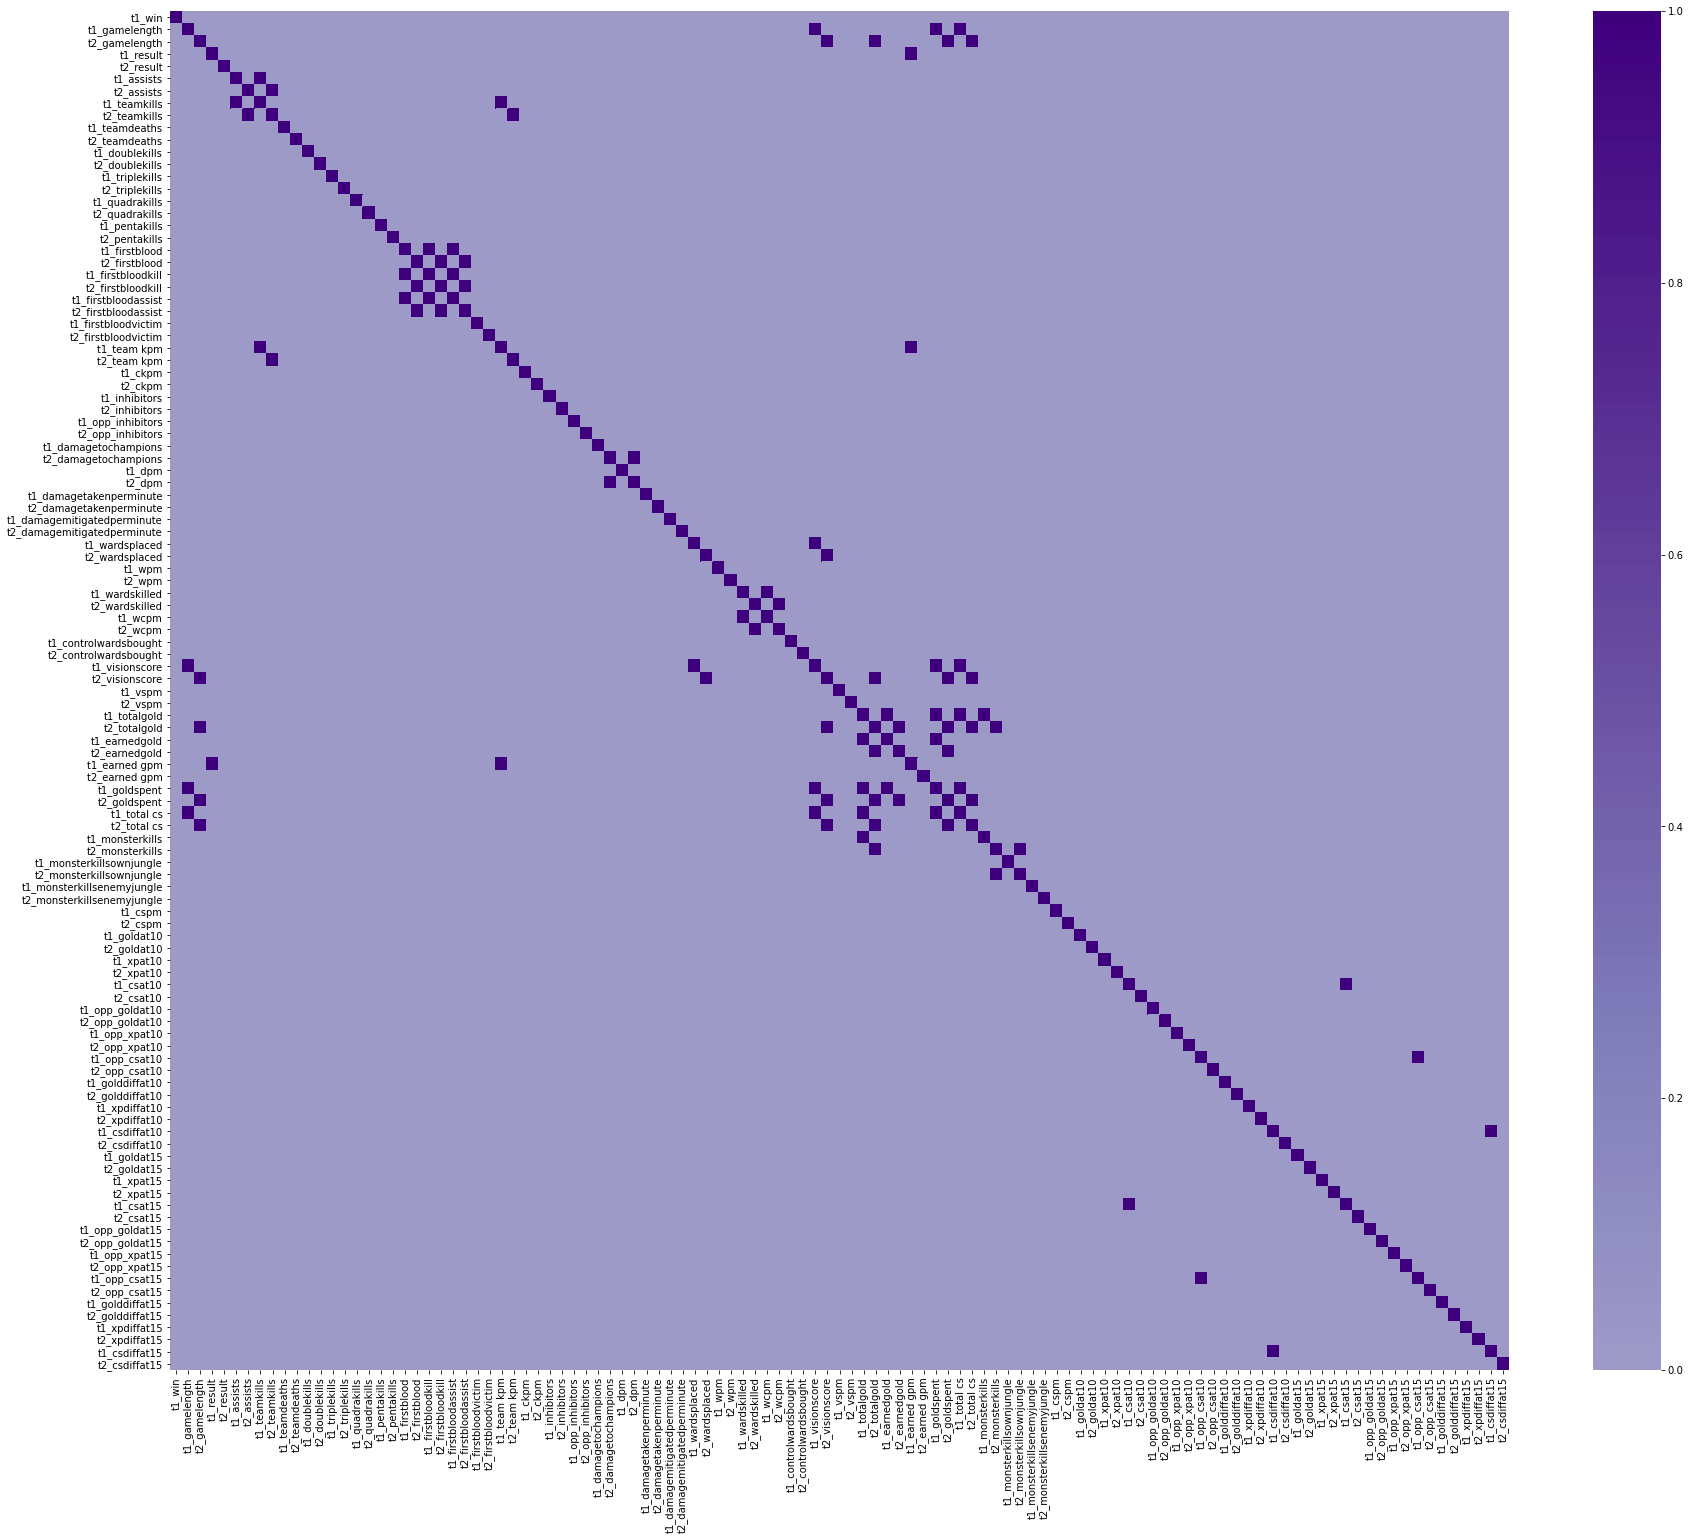

In [429]:
fig = plt.figure(figsize=(30,25))

sns.heatmap(abs(df1.corr() > 0.85), center=0, cmap='Purples')
plt.show()

In [433]:
df1.drop(to_drop, axis=1, inplace=True)
df1

,team1_team,team2_team,t1_win,t1_result,t2_result,t1_assists,t2_assists,t1_teamdeaths,t2_teamdeaths,t1_doublekills,...,t1_opp_goldat15,t2_opp_goldat15,t1_opp_xpat15,t2_opp_xpat15,t1_golddiffat15,t2_golddiffat15,t1_xpdiffat15,t2_xpdiffat15,t1_csdiffat15,t2_csdiffat15
1118,Fnatic,Gen.G,1,0.5,0.0,15.0,29.5,8.5,15.0,0.5,...,24065.5,25987.5,29541.0,29007.5,1149.0,-2435.0,533.5,88.0,14.5,-23.5
1117,Top Esports,Unicorns Of Love.CIS,1,1.0,0.5,40.5,39.5,8.0,11.0,0.5,...,25057.0,24068.0,28710.5,28895.0,929.5,2077.5,1280.0,2619.0,6.0,43.0
1116,DRX,FlyQuest,1,0.5,0.5,32.0,38.0,10.5,11.5,2.0,...,23955.5,23664.5,29299.5,28066.0,3541.5,2475.5,2248.0,2131.0,62.0,12.0
1115,Suning,Machi Esports,1,0.5,0.5,41.5,28.0,10.5,12.0,1.0,...,23245.0,24573.0,28853.0,29116.5,2082.5,1322.5,1978.0,1012.5,48.0,9.0
1114,G2 Esports,Team Liquid,0,1.0,0.5,52.5,15.0,18.0,5.5,2.0,...,24326.0,23005.5,29592.5,28982.5,1925.5,2452.5,63.0,1716.5,-9.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Oh My God,Victory Five,0,0.0,0.5,10.5,39.0,21.0,15.0,0.0,...,26547.0,26420.5,30102.0,29045.0,-1340.0,-3641.5,-1980.5,-2111.5,-3.0,-16.5
12,Team WE,Suning,0,0.5,0.5,29.5,29.5,11.5,11.5,0.5,...,24628.5,24628.5,29903.0,29903.0,164.0,164.0,-50.5,-50.5,-25.5,-25.5
11,Suning,Team WE,1,0.5,0.5,26.0,34.5,10.5,11.5,1.0,...,24720.0,25509.0,31066.0,29616.5,-687.5,-1280.5,-701.0,-655.5,24.0,-1.0
10,Team WE,Suning,1,1.0,1.0,60.0,32.5,14.5,5.5,3.5,...,27107.5,23840.5,29979.5,29710.0,-2583.5,-193.0,-1489.0,572.5,-19.0,29.0


In [437]:
more_drop = ['t1_total cs', 't2_total cs', 't1_csdiffat15', 't2_csdiffat15',
             't1_monsterkills', 't2_monsterkills', 't1_golddiffat15', 't2_golddiffat15',
             't1_xpdiffat15', 't2_xpdiffat15', 't1_opp_goldat15', 't2_opp_goldat15',
             't1_wpm', 't2_wpm', 't1_goldat15', 't2_goldat15',
             't1_damagetochampions', 't2_damagetochampions', 't1_controlwardsbought', 't2_controlwardsbought',
             't1_xpat15', 't2_xpat15']

In [436]:
df_cc[(df_cc['cc'] > 0.75) & (df_cc['cc'] < 1)]


,cc
pairs,
"(t1_totalgold, t1_total cs)",0.877949
"(t2_totalgold, t2_total cs)",0.874368
"(t1_csdiffat10, t1_csdiffat15)",0.872721
"(t1_totalgold, t1_monsterkills)",0.864261
"(t2_monsterkills, t2_totalgold)",0.863871
"(t1_golddiffat15, t1_golddiffat10)",0.840839
"(t2_total cs, t2_monsterkills)",0.840567
"(t1_total cs, t1_monsterkills)",0.838333
"(t2_csdiffat10, t2_csdiffat15)",0.828887


In [438]:
df1.drop(more_drop, axis=1, inplace=True)
df1

,team1_team,team2_team,t1_win,t1_result,t2_result,t1_assists,t2_assists,t1_teamdeaths,t2_teamdeaths,t1_doublekills,...,t1_opp_csat10,t2_opp_csat10,t1_golddiffat10,t2_golddiffat10,t1_xpdiffat10,t2_xpdiffat10,t1_csdiffat10,t2_csdiffat10,t1_opp_xpat15,t2_opp_xpat15
1118,Fnatic,Gen.G,1,0.5,0.0,15.0,29.5,8.5,15.0,0.5,...,336.5,320.0,755.5,-845.5,570.0,-812.0,6.5,-44.0,29541.0,29007.5
1117,Top Esports,Unicorns Of Love.CIS,1,1.0,0.5,40.5,39.5,8.0,11.0,0.5,...,324.0,301.5,569.0,1319.0,45.0,702.0,-14.5,8.0,28710.5,28895.0
1116,DRX,FlyQuest,1,0.5,0.5,32.0,38.0,10.5,11.5,2.0,...,311.5,307.0,1896.0,1114.0,904.5,599.5,24.5,-17.0,29299.5,28066.0
1115,Suning,Machi Esports,1,0.5,0.5,41.5,28.0,10.5,12.0,1.0,...,310.5,297.5,1300.0,191.5,1002.5,291.5,23.5,2.5,28853.0,29116.5
1114,G2 Esports,Team Liquid,0,1.0,0.5,52.5,15.0,18.0,5.5,2.0,...,312.0,298.0,-13.5,1302.0,-278.5,1065.5,-4.5,26.5,29592.5,28982.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Oh My God,Victory Five,0,0.0,0.5,10.5,39.0,21.0,15.0,0.0,...,305.0,302.5,-722.5,-1946.5,-755.0,-1455.5,9.0,-18.0,30102.0,29045.0
12,Team WE,Suning,0,0.5,0.5,29.5,29.5,11.5,11.5,0.5,...,337.0,337.0,-346.5,-346.5,257.5,257.5,-12.0,-12.0,29903.0,29903.0
11,Suning,Team WE,1,0.5,0.5,26.0,34.5,10.5,11.5,1.0,...,333.0,315.5,151.0,-326.5,-599.5,-959.5,3.0,-4.0,31066.0,29616.5
10,Team WE,Suning,1,1.0,1.0,60.0,32.5,14.5,5.5,3.5,...,317.0,337.5,-1538.0,194.0,-1644.5,327.0,-12.0,16.5,29979.5,29710.0


In [443]:
df_cc=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

df_cc.set_index(['pairs'], inplace = True)

df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

df_cc.columns = ['cc']

df_cc.drop_duplicates(inplace=True)

In [445]:
df_cc[(df_cc['cc'] > 0.70) & (df_cc['cc'] < 1)]

,cc
pairs,
"(t2_totalgold, t2_wardsplaced)",0.736643
"(t1_assists, t1_doublekills)",0.731462
"(t2_wardsplaced, t2_wardskilled)",0.727352
"(t1_teamdeaths, t1_result)",0.724935
"(t2_vspm, t2_wardskilled)",0.723504
"(t1_wardsplaced, t1_wardskilled)",0.721458
"(t1_result, t1_assists)",0.719487
"(t2_wardsplaced, t2_vspm)",0.717191
"(t1_vspm, t1_wardskilled)",0.708677


In [441]:
drop_again = ['t1_xpdiffat10', 't2_xpdiffat10', 't1_opp_goldat10', 't2_opp_goldat10',
              't2_csat10', 't1_csat10', 't1_opp_inhibitors', 't2_opp_inhibitors',
              't1_golddiffat10', 't2_golddiffat10', 't1_opp_csat10', 't2_opp_csat10',
              't1_inhibitors', 't2_inhibitors', 't1_opp_xpat15', 't2_opp_xpat15']

In [442]:
df1.drop(drop_again, axis=1, inplace=True)
df1

,team1_team,team2_team,t1_win,t1_result,t2_result,t1_assists,t2_assists,t1_teamdeaths,t2_teamdeaths,t1_doublekills,...,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_opp_xpat10,t2_opp_xpat10,t1_csdiffat10,t2_csdiffat10
1118,Fnatic,Gen.G,1,0.5,0.0,15.0,29.5,8.5,15.0,0.5,...,35.41700,29.46390,15974.5,15090.5,18638.5,17229.0,18068.5,18041.0,6.5,-44.0
1117,Top Esports,Unicorns Of Love.CIS,1,1.0,0.5,40.5,39.5,8.0,11.0,0.5,...,34.12415,32.12750,16016.0,15996.0,18301.5,18696.0,18256.5,17994.0,-14.5,8.0
1116,DRX,FlyQuest,1,0.5,0.5,32.0,38.0,10.5,11.5,2.0,...,34.93260,31.44340,16509.5,16063.5,19123.5,18252.5,18219.0,17653.0,24.5,-17.0
1115,Suning,Machi Esports,1,0.5,0.5,41.5,28.0,10.5,12.0,1.0,...,33.05460,33.72285,15888.5,16057.5,19156.0,18415.5,18153.5,18124.0,23.5,2.5
1114,G2 Esports,Team Liquid,0,1.0,0.5,52.5,15.0,18.0,5.5,2.0,...,30.78370,35.43345,15963.5,15881.0,18519.5,18798.5,18798.0,17733.0,-4.5,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Oh My God,Victory Five,0,0.0,0.5,10.5,39.0,21.0,15.0,0.0,...,32.94650,31.62020,16526.0,14616.5,17647.5,16375.5,18402.5,17831.0,9.0,-18.0
12,Team WE,Suning,0,0.5,0.5,29.5,29.5,11.5,11.5,0.5,...,32.25220,32.25220,14994.5,14994.5,18669.0,18669.0,18411.5,18411.5,-12.0,-12.0
11,Suning,Team WE,1,0.5,0.5,26.0,34.5,10.5,11.5,1.0,...,35.22690,33.12615,15131.0,15427.5,18563.5,17632.5,19163.0,18592.0,3.0,-4.0
10,Team WE,Suning,1,1.0,1.0,60.0,32.5,14.5,5.5,3.5,...,31.70885,35.70170,15762.5,15267.5,17301.0,19036.5,18945.5,18709.5,-12.0,16.5


In [446]:
df_cc=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

df_cc.set_index(['pairs'], inplace = True)

df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

df_cc.columns = ['cc']

df_cc.drop_duplicates(inplace=True)

In [447]:
df_cc[(df_cc['cc'] > 0.70) & (df_cc['cc'] < 1)]

,cc
pairs,
"(t2_totalgold, t2_wardsplaced)",0.736643
"(t1_assists, t1_doublekills)",0.731462
"(t2_wardsplaced, t2_wardskilled)",0.727352
"(t1_teamdeaths, t1_result)",0.724935
"(t2_vspm, t2_wardskilled)",0.723504
"(t1_wardsplaced, t1_wardskilled)",0.721458
"(t1_result, t1_assists)",0.719487
"(t2_wardsplaced, t2_vspm)",0.717191
"(t1_vspm, t1_wardskilled)",0.708677


In [448]:
drop_again = ['t2_wardsplaced', 't1_wardsplaced', 't1_doublekills', 't2_doublekills',
              't1_teamdeaths', 't2_teamdeaths', 't1_vspm', 't2_vspm']

In [449]:
df1.drop(drop_again, axis=1, inplace=True)

In [451]:
df_cc=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

df_cc.set_index(['pairs'], inplace = True)

df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

df_cc.columns = ['cc']

df_cc.drop_duplicates(inplace=True)

df_cc[(df_cc['cc'] > 0.70) & (df_cc['cc'] < 1)]

,cc
pairs,
"(t1_assists, t1_result)",0.719487


In [454]:
final_drop = ['t1_assists', 't1_firstblood', 't2_firstblood']
df1.drop(final_drop, axis=1, inplace=True)

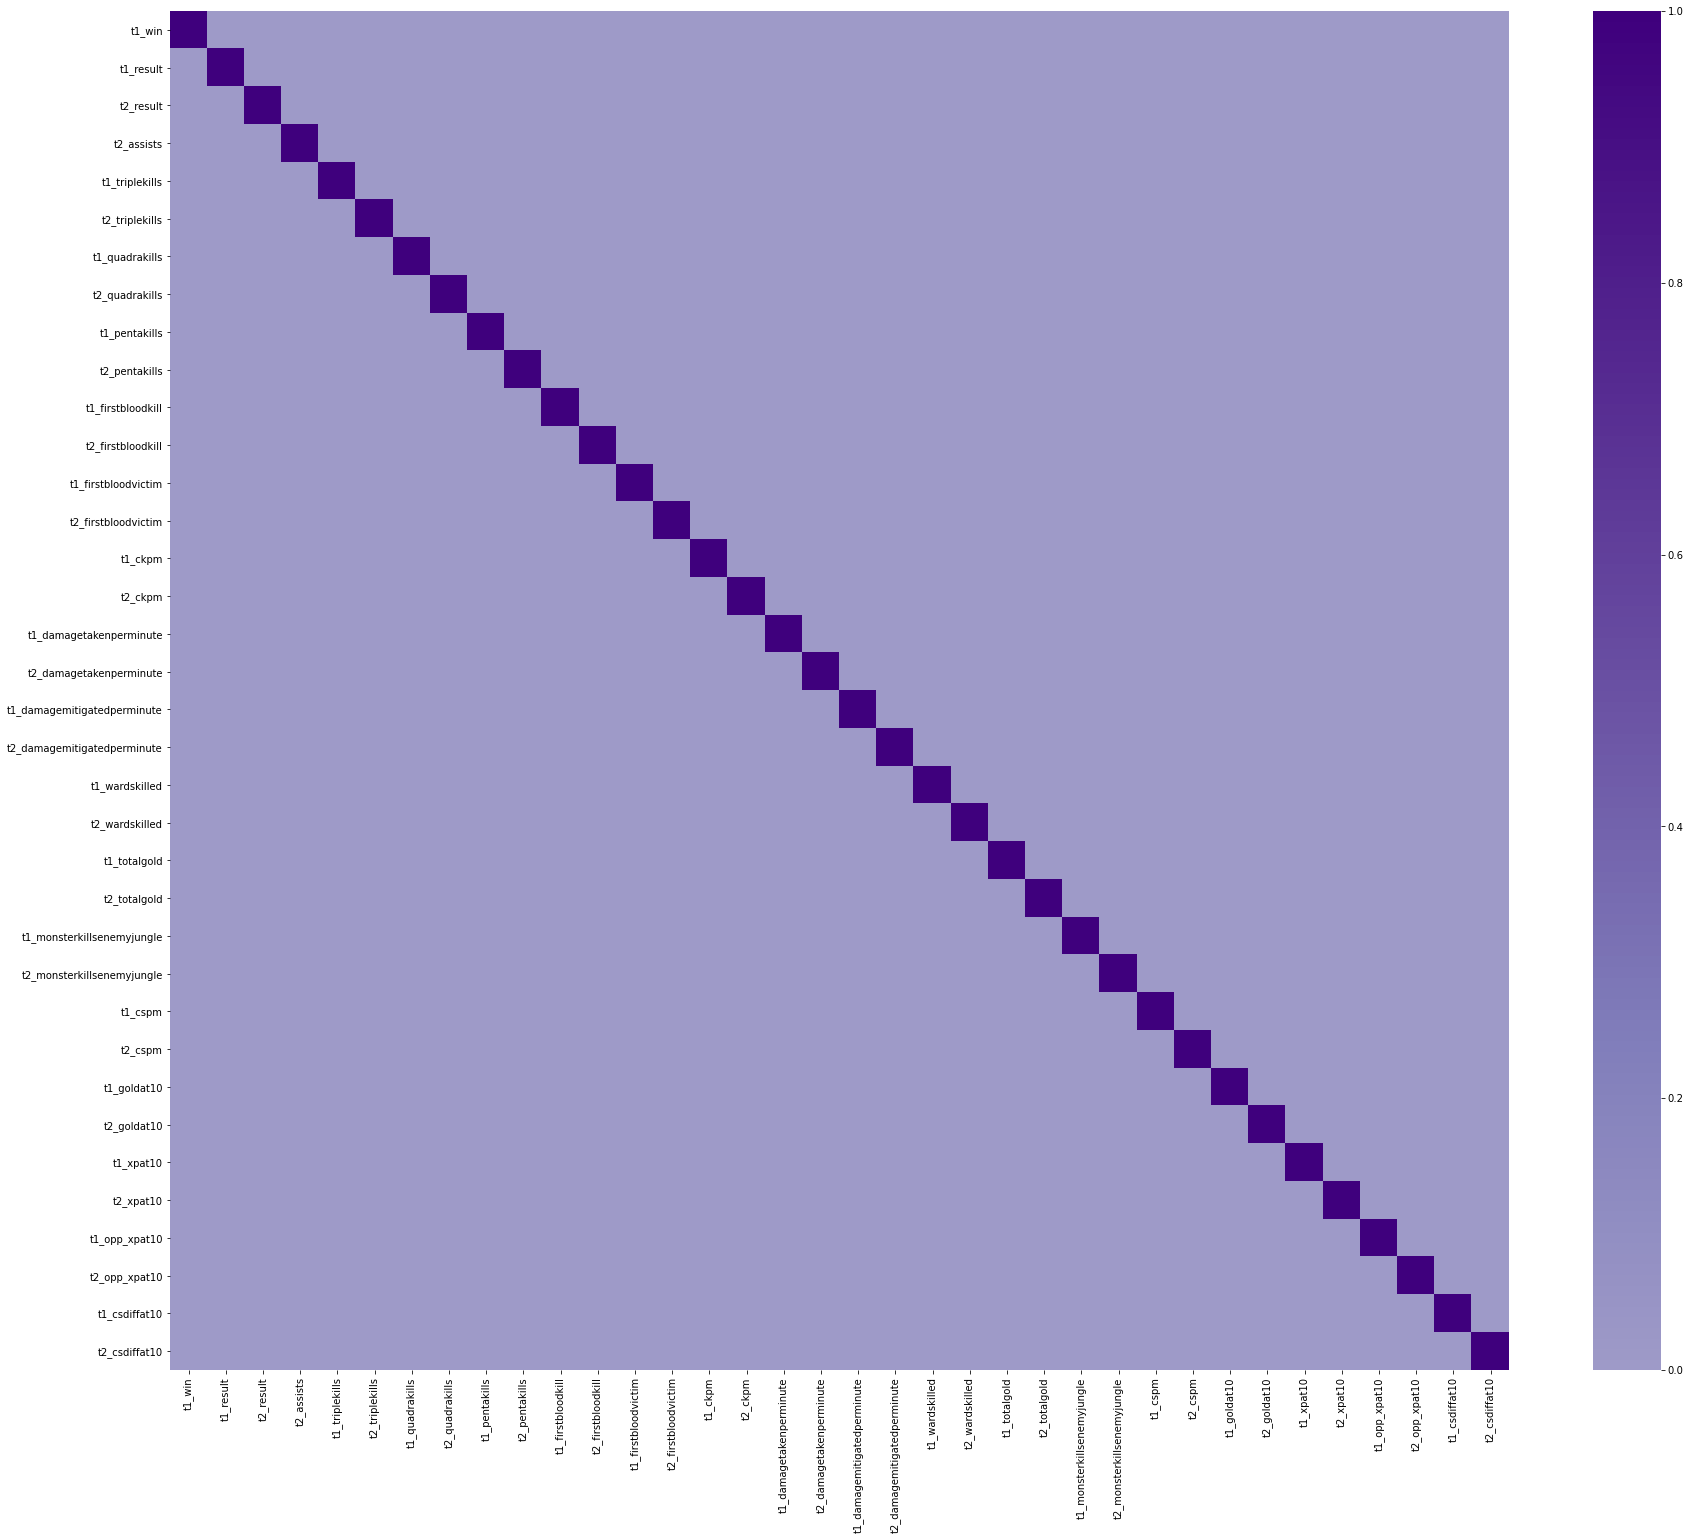

In [455]:
fig = plt.figure(figsize=(30,25))

sns.heatmap(abs(df1.corr() > 0.7), center=0, cmap='Purples')
plt.show()

# Exploring Dataset

In [456]:
df1

,team1_team,team2_team,t1_win,t1_result,t2_result,t2_assists,t1_triplekills,t2_triplekills,t1_quadrakills,t2_quadrakills,...,t1_cspm,t2_cspm,t1_goldat10,t2_goldat10,t1_xpat10,t2_xpat10,t1_opp_xpat10,t2_opp_xpat10,t1_csdiffat10,t2_csdiffat10
1118,Fnatic,Gen.G,1,0.5,0.0,29.5,0.0,0.0,0.0,0.0,...,35.41700,29.46390,15974.5,15090.5,18638.5,17229.0,18068.5,18041.0,6.5,-44.0
1117,Top Esports,Unicorns Of Love.CIS,1,1.0,0.5,39.5,0.0,0.5,0.0,0.5,...,34.12415,32.12750,16016.0,15996.0,18301.5,18696.0,18256.5,17994.0,-14.5,8.0
1116,DRX,FlyQuest,1,0.5,0.5,38.0,0.5,0.0,0.5,0.0,...,34.93260,31.44340,16509.5,16063.5,19123.5,18252.5,18219.0,17653.0,24.5,-17.0
1115,Suning,Machi Esports,1,0.5,0.5,28.0,0.0,0.0,0.0,0.0,...,33.05460,33.72285,15888.5,16057.5,19156.0,18415.5,18153.5,18124.0,23.5,2.5
1114,G2 Esports,Team Liquid,0,1.0,0.5,15.0,0.0,0.0,0.0,0.0,...,30.78370,35.43345,15963.5,15881.0,18519.5,18798.5,18798.0,17733.0,-4.5,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Oh My God,Victory Five,0,0.0,0.5,39.0,0.0,0.0,0.0,0.0,...,32.94650,31.62020,16526.0,14616.5,17647.5,16375.5,18402.5,17831.0,9.0,-18.0
12,Team WE,Suning,0,0.5,0.5,29.5,0.5,0.5,0.0,0.0,...,32.25220,32.25220,14994.5,14994.5,18669.0,18669.0,18411.5,18411.5,-12.0,-12.0
11,Suning,Team WE,1,0.5,0.5,34.5,0.5,0.0,0.0,0.0,...,35.22690,33.12615,15131.0,15427.5,18563.5,17632.5,19163.0,18592.0,3.0,-4.0
10,Team WE,Suning,1,1.0,1.0,32.5,0.0,0.5,0.0,0.0,...,31.70885,35.70170,15762.5,15267.5,17301.0,19036.5,18945.5,18709.5,-12.0,16.5


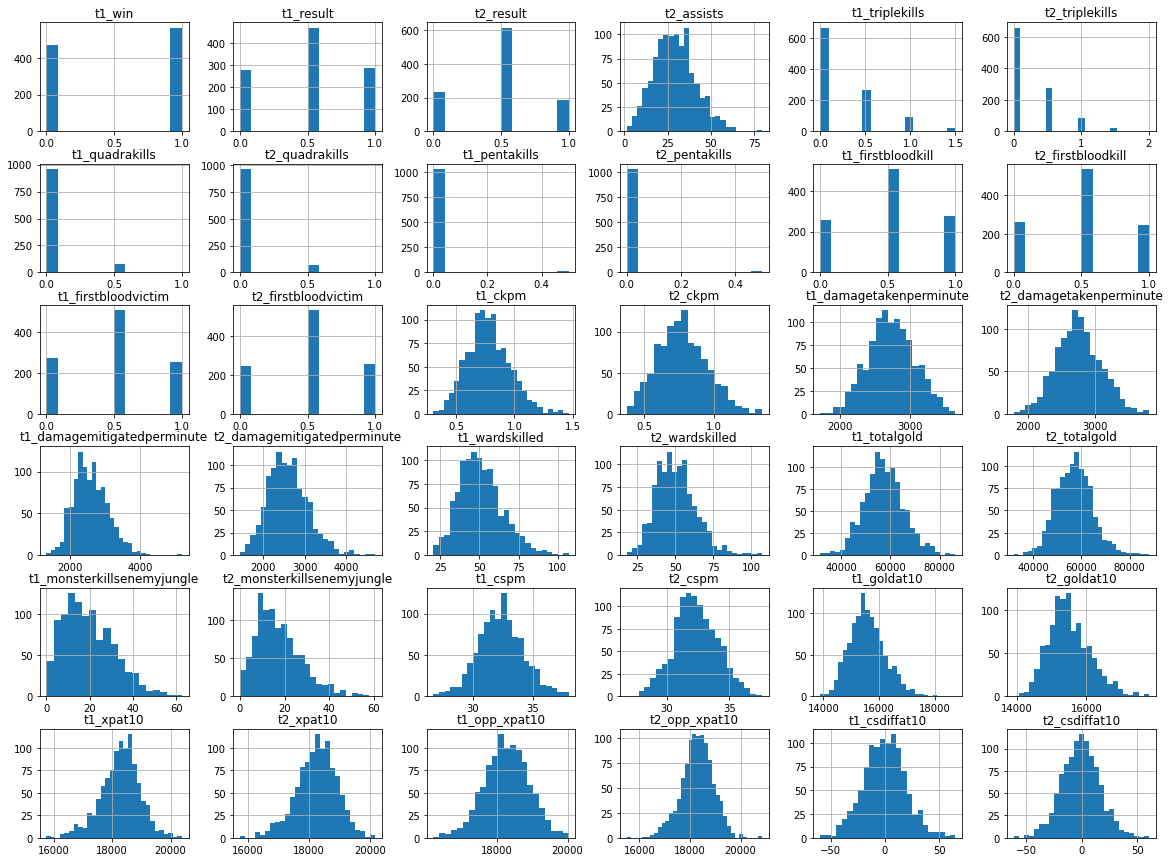

In [457]:
df1.hist(figsize=(20, 15), bins='auto');

In [ ]:
bin_cols = ['t1_win', 't1_result', 't2_result', '']

# DELETE DELETE DELETE

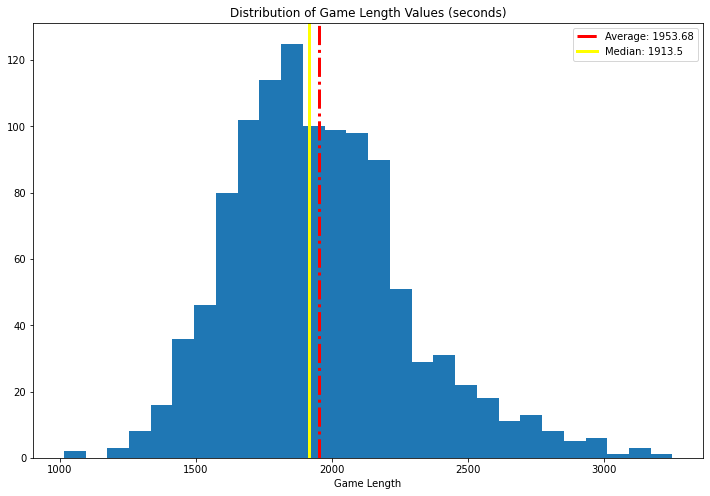

In [108]:
fig = plt.figure(figsize=(12,8))

mean_length = df_merge['team1_gamelength'].mean()
median_length = df_merge['team1_gamelength'].median()

plt.hist('team1_gamelength', data=df_merge, bins='auto')
plt.axvline(mean_length, ls = '-.', lw = 3, c='red', 
            label=f'Average: {round(mean_length,2)}')
plt.axvline(median_length, ls = '-', lw = 3, c='yellow',
            label=f'Median: {round(median_length, 2)}')
plt.title('Distribution of Game Length Values (seconds)')
plt.xlabel('Game Length')
plt.legend()
plt.show()

In [ ]:
def combine_data(df):

    team2_stats = {}

    for col in df_teams.columns:
        team2_stats[f'team2_{col}'] = []

        for game in gameid:
            teams_ind = df_test.loc[(df_test['gameid'] == game), 'team'].index
            team1 = teams_ind[0]
            team2 = teams_ind[1]

            team2_stats[f'team2_{col}'].append(df_test.loc[team2, col])



    
    
team2_stats['team2_assists']


only need to figure out which player data columns to combine with already completed team data rows
don't need to adjust team data rows very much besides filling in null values

need to give each match a number/counter to be able to identify previous matches on same day (to calculate averages)

need to build new df to predict results of match using running averages of stats from previous matches

## ext vs match
external features: known prior to upcoming match
match features: not known until match has been played, only know average of stats for certain amount of past matches

In [125]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 50

In [221]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("once")

In [423]:
import seaborn as sns